In [132]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [133]:
# Cargar datos
df = pd.read_csv("Dataset_Peliculas.csv") 

# Vista general
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [134]:
## 💡 Franja 2: Conversión directa de columnas tipo JSON a estructuras Python, incluyendo 'keywords'
# Objetivo: Reemplazar las columnas que contienen listas codificadas como strings JSON, incluyendo 'keywords'

import json

# Lista de columnas que contienen datos en formato string con listas de diccionarios
columnas_json = [
    'spoken_languages', 
    'genres', 
    'production_companies', 
    'production_countries',
    'keywords'  # ✅ Añadido correctamente
]

def convertir_a_lista(diccionario_str):
    """
    Convierte una cadena de texto en formato lista de diccionarios a su representación en Python.
    Reemplaza comillas simples por dobles y maneja errores de decodificación.
    """
    if pd.isnull(diccionario_str) or diccionario_str.strip() == '':
        return []
    try:
        return json.loads(diccionario_str.replace("'", '"'))
    except json.JSONDecodeError:
        # Opcional: imprimir o registrar valores que fallan
        # print("Error al decodificar:", diccionario_str)
        return []

# Aplicamos la conversión directamente a cada columna
for col in columnas_json:
    df[col] = df[col].apply(convertir_a_lista)

# 💡 Franja 3: Transformación de la columna 'keywords' para conservar solo los nombres
# Objetivo: Reemplazar cada fila con una lista de nombres de palabras clave (sin diccionarios)

# Asegurarse de que todos los elementos sean listas de diccionarios primero
df['spoken_language_names'] = df['spoken_languages'].apply(lambda langs: [lang['name'] for lang in langs])
df['genre_names'] = df['genres'].apply(lambda genres: [genre['name'] for genre in genres])
df['production_company_names'] = df['production_companies'].apply(lambda comps: [comp['name'] for comp in comps])
df['production_country_names'] = df['production_countries'].apply(lambda countries: [country['name'] for country in countries])

# 💡 Franja: Transformación de la columna 'status' a valores numéricos y limpieza
# Objetivo: Mapear estados específicos a valores enteros y eliminar los estados no reconocidos

df = df[df['status'] == 'Released'].copy()

# Verificamos resultados
print("✅ Distribución de estados codificados:")
print(df['status'].value_counts())

# Asegurarse de que la columna esté en formato datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extraer el año
df['release_date'] = df['release_date'].dt.year

# Verificamos el resultado
df.head(10)



✅ Distribución de estados codificados:
status
Released    4795
Name: count, dtype: int64


budget                                             genres  \
0  237000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
1  300000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
3  250000000  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  260000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
5  258000000  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
6  260000000  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
7  280000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
8  250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
9  250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                            homepage      id  \
0                        http://www.avatarmovie.com/   19995   
1       http://disney.go.com/disneypictures/pirates/     285   
2        http://www.sonypictures.com/movies/spectre/  206647   
3                 http://www.thedarkknightrises.com/   49026   
4               http://movies.disney.com/john-carter   49529   
5    http://www.sonypictures.com/movies/spider-man3/     559   
6       http://disney.go.com/disneypictures/tangled/   38757   
7  http://marvel.com/movies/movie/193/avengers_ag...   99861   
8  http://harrypotter.warnerbros.com/harrypottera...     767   
9       http://www.batmanvsupermandawnofjustice.com/  209112   

                                            keywords original_language  \
0  [{'id': 1463, 'name': 'culture clash'}, {'id':...                en   
1                                                 []                en   
2  [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...                en   
3  [{'id': 849, 'name': 'dc comics'}, {'id': 853,...                en   
4  [{'id': 818, 'name': 'based on novel'}, {'id':...                en   
5                                                 []                en   
6  [{'id': 1562, 'name': 'hostage'}, {'id': 2343,...                en   
7  [{'id': 8828, 'name': 'marvel comic'}, {'id': ...                en   
8  [{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...                en   
9  [{'id': 849, 'name': 'dc comics'}, {'id': 7002...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   
5                              Spider-Man 3   
6                                   Tangled   
7                   Avengers: Age of Ultron   
8    Harry Potter and the Half-Blood Prince   
9        Batman v Superman: Dawn of Justice   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   
5  The seemingly invincible Spider-Man goes up ag...  115.699814   
6  When the kingdom's most wanted-and most charmi...   48.681969   
7  When Tony Stark tries to jumpstart a dormant p...  134.279229   
8  As Harry begins his sixth year at Hogwarts, he...   98.885637   
9  Fearing the actions of a god-like Super Hero l...  155.790452   

                                production_companies  ...  \
0  [{'name': 'Ingenious Film Partners', 'id': 289...  ...   
1  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  ...   
2  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...   
3  [{'name': 'Legendary Pictures', 'id': 923}, {'...  ...   
4        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...   
5  [{'name': 'Columbia Pictures', 'id': 5}, {'nam...  ...   
6  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  

In [135]:
df.drop(columns=['spoken_languages', 'genres', 'production_companies', 'production_countries', 'tagline', 'homepage', 'title', 'id', 'keywords', 'overview', 'status', 'original_language', 'original_title', 'spoken_language_names', 'genre_names', 'production_company_names', 'production_country_names'], inplace=True)
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4795 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4795 non-null   int64  
 1   popularity    4795 non-null   float64
 2   release_date  4794 non-null   float64
 3   revenue       4795 non-null   int64  
 4   runtime       4793 non-null   float64
 5   vote_average  4795 non-null   float64
 6   vote_count    4795 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 299.7 KB


budget  popularity  release_date     revenue  runtime  vote_average  \
0  237000000  150.437577        2009.0  2787965087    162.0           7.2   
1  300000000  139.082615        2007.0   961000000    169.0           6.9   
2  245000000  107.376788        2015.0   880674609    148.0           6.3   
3  250000000  112.312950        2012.0  1084939099    165.0           7.6   
4  260000000   43.926995        2012.0   284139100    132.0           6.1   

   vote_count  
0       11800  
1        4500  
2        4466  
3        9106  
4        2124

In [136]:
# 💡 Franja 4 (versión conservadora): Imputación de valores cero en lugar de eliminar registros
# Objetivo: Conservar el mayor número de registros imputando valores donde sea razonable


df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['runtime'] = df['runtime'].replace(0, df['runtime'].median())

# Mostramos valores después de imputación
print("✅ Después de imputar:")
for col in ['budget', 'revenue', 'runtime']:
    ceros = (df[col] == 0).sum()
    print(f"{col}: {ceros} ceros restantes")



✅ Después de imputar:
budget: 1032 ceros restantes
revenue: 1420 ceros restantes
runtime: 0 ceros restantes


In [137]:
# 💡 Franja extra: Verificar la relación entre valores cero en 'budget' y 'revenue'

# Películas con presupuesto = 0
mask_budget_0 = df['budget'] == 0
# Películas con ingresos = 0
mask_revenue_0 = df['revenue'] == 0

# Total con presupuesto = 0
total_budget_0 = mask_budget_0.sum()
# Total con revenue = 0
total_revenue_0 = mask_revenue_0.sum()
# Total donde ambos son 0
total_ambos_0 = (mask_budget_0 & mask_revenue_0).sum()
# Casos distintos
solo_budget_0 = (mask_budget_0 & ~mask_revenue_0).sum()
solo_revenue_0 = (mask_revenue_0 & ~mask_budget_0).sum()

print("🔍 Análisis cruzado de ceros:")
print(f"Películas con budget = 0           : {total_budget_0}")
print(f"Películas con revenue = 0          : {total_revenue_0}")
print(f"Películas con ambos = 0            : {total_ambos_0}")
print(f"Películas con solo budget = 0      : {solo_budget_0}")
print(f"Películas con solo revenue = 0     : {solo_revenue_0}")


🔍 Análisis cruzado de ceros:
Películas con budget = 0           : 1032
Películas con revenue = 0          : 1420
Películas con ambos = 0            : 885
Películas con solo budget = 0      : 147
Películas con solo revenue = 0     : 535


In [138]:
# 💡 Franja: Imputar 'budget' y 'revenue' según la dispersión del grupo por año
# Objetivo: Usar la desviación estándar para decidir entre imputar con media o mediana

def imputar_condicional(df, columna_objetivo):
    df = df.copy()
    
    # Iterar por cada año único
    for year in df['release_date'].dropna().unique():
        # Filtrar valores válidos (no cero)
        grupo = df[(df['release_date'] == year) & (df[columna_objetivo] > 0)][columna_objetivo]
        
        # Saltar si no hay suficientes datos
        if len(grupo) < 2:
            continue
        
        media = grupo.mean()
        mediana = grupo.median()
        std = grupo.std()
        
        # Umbral para considerar "alta" desviación
        if std > 1.5 * media:
            valor_imputado = mediana
        else:
            valor_imputado = media
        
        # Aplicar imputación a valores 0
        df.loc[(df['release_date'] == year) & (df[columna_objetivo] == 0), columna_objetivo] = valor_imputado
    
    return df

# Aplicamos la función a ambas columnas
df = imputar_condicional(df, 'budget')
df = imputar_condicional(df, 'revenue')

# Verificamos
print("✅ Verificación final de ceros:")
print("Budget:", (df['budget'] == 0).sum())
print("Revenue:", (df['revenue'] == 0).sum())


✅ Verificación final de ceros:
Budget: 5
Revenue: 7


C:\Users\57311\AppData\Local\Temp\ipykernel_8296\1293079450.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '41099283.666666664' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['release_date'] == year) & (df[columna_objetivo] == 0), columna_objetivo] = valor_imputado
C:\Users\57311\AppData\Local\Temp\ipykernel_8296\1293079450.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '198098040.38356164' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['release_date'] == year) & (df[columna_objetivo] == 0), columna_objetivo] = valor_imputado


In [139]:
# 💡 Franja extra: Verificar la relación entre valores cero en 'budget' y 'revenue'

# Películas con presupuesto = 0
mask_budget_0 = df['budget'] == 0
# Películas con ingresos = 0
mask_revenue_0 = df['revenue'] == 0

# Total con presupuesto = 0
total_budget_0 = mask_budget_0.sum()
# Total con revenue = 0
total_revenue_0 = mask_revenue_0.sum()
# Total donde ambos son 0
total_ambos_0 = (mask_budget_0 & mask_revenue_0).sum()
# Casos distintos
solo_budget_0 = (mask_budget_0 & ~mask_revenue_0).sum()
solo_revenue_0 = (mask_revenue_0 & ~mask_budget_0).sum()

print("🔍 Análisis cruzado de ceros:")
print(f"Películas con budget = 0           : {total_budget_0}")
print(f"Películas con revenue = 0          : {total_revenue_0}")
print(f"Películas con ambos = 0            : {total_ambos_0}")
print(f"Películas con solo budget = 0      : {solo_budget_0}")
print(f"Películas con solo revenue = 0     : {solo_revenue_0}")


🔍 Análisis cruzado de ceros:
Películas con budget = 0           : 5
Películas con revenue = 0          : 7
Películas con ambos = 0            : 5
Películas con solo budget = 0      : 0
Películas con solo revenue = 0     : 2


In [140]:
# 💡 Franja: Crear columna 'profit' (ganancia) con validación de ceros
# Objetivo: Calcular revenue - budget solo cuando ambos valores son mayores a cero

def calcular_ganancia(row):
        return row['revenue'] - row['budget']

df['profit'] = df.apply(calcular_ganancia, axis=1)

# Verificamos
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4795 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4795 non-null   float64
 1   popularity    4795 non-null   float64
 2   release_date  4794 non-null   float64
 3   revenue       4795 non-null   float64
 4   runtime       4795 non-null   float64
 5   vote_average  4795 non-null   float64
 6   vote_count    4795 non-null   int64  
 7   profit        4795 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 337.1 KB


budget  popularity  release_date       revenue  runtime  vote_average  \
0  237000000.0  150.437577        2009.0  2.787965e+09    162.0           7.2   
1  300000000.0  139.082615        2007.0  9.610000e+08    169.0           6.9   
2  245000000.0  107.376788        2015.0  8.806746e+08    148.0           6.3   
3  250000000.0  112.312950        2012.0  1.084939e+09    165.0           7.6   
4  260000000.0   43.926995        2012.0  2.841391e+08    132.0           6.1   

   vote_count        profit  
0       11800  2.550965e+09  
1        4500  6.610000e+08  
2        4466  6.356746e+08  
3        9106  8.349391e+08  
4        2124  2.413910e+07

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 640x480 with 0 Axes>

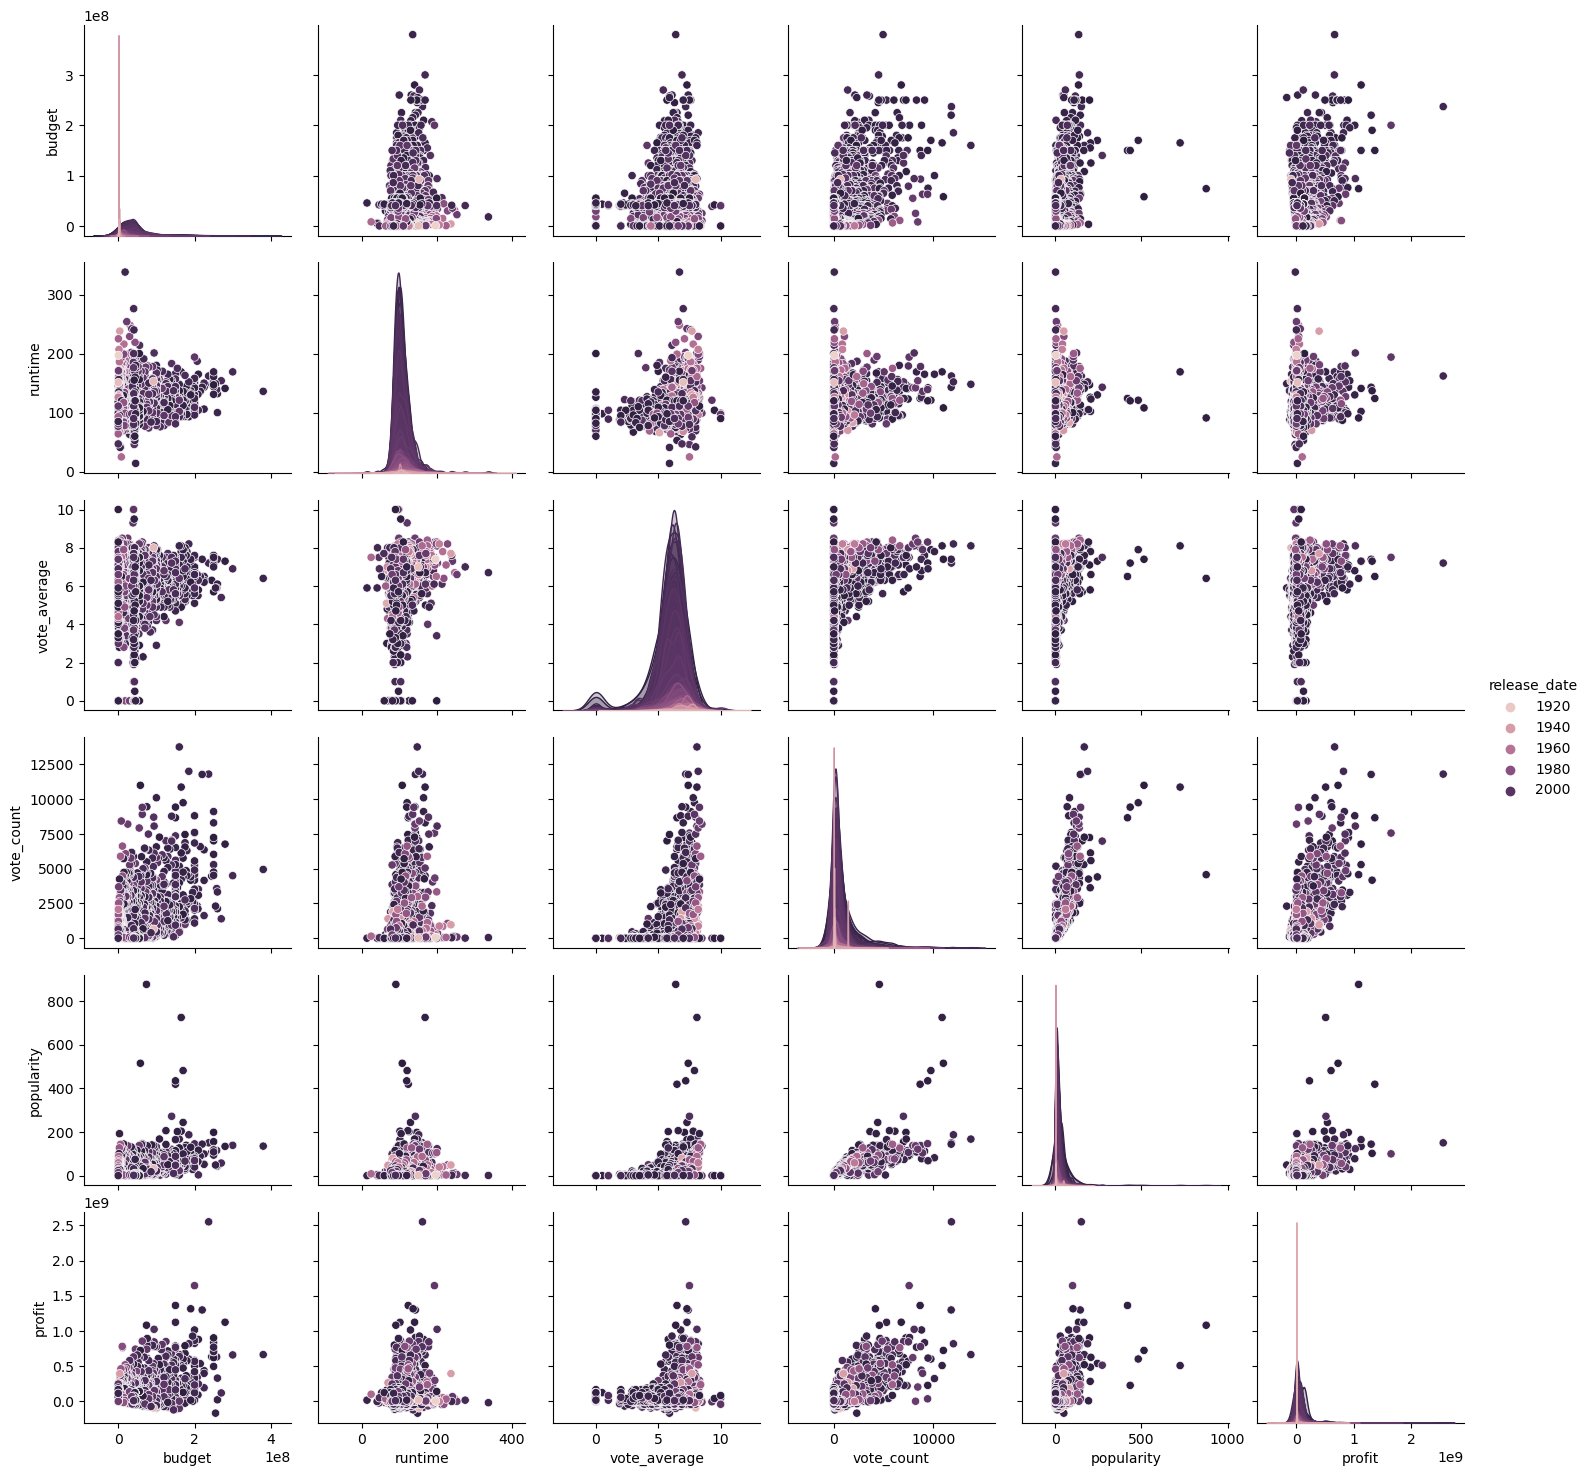

In [141]:
# graficar algunas características
plot = ['budget', 'runtime', 'vote_average', 'vote_count', 'popularity', 'profit', 'release_date']
plt.figure()
sns.pairplot(df[plot], hue= "release_date")
#Taking hue 
plt.show()

<Axes: >

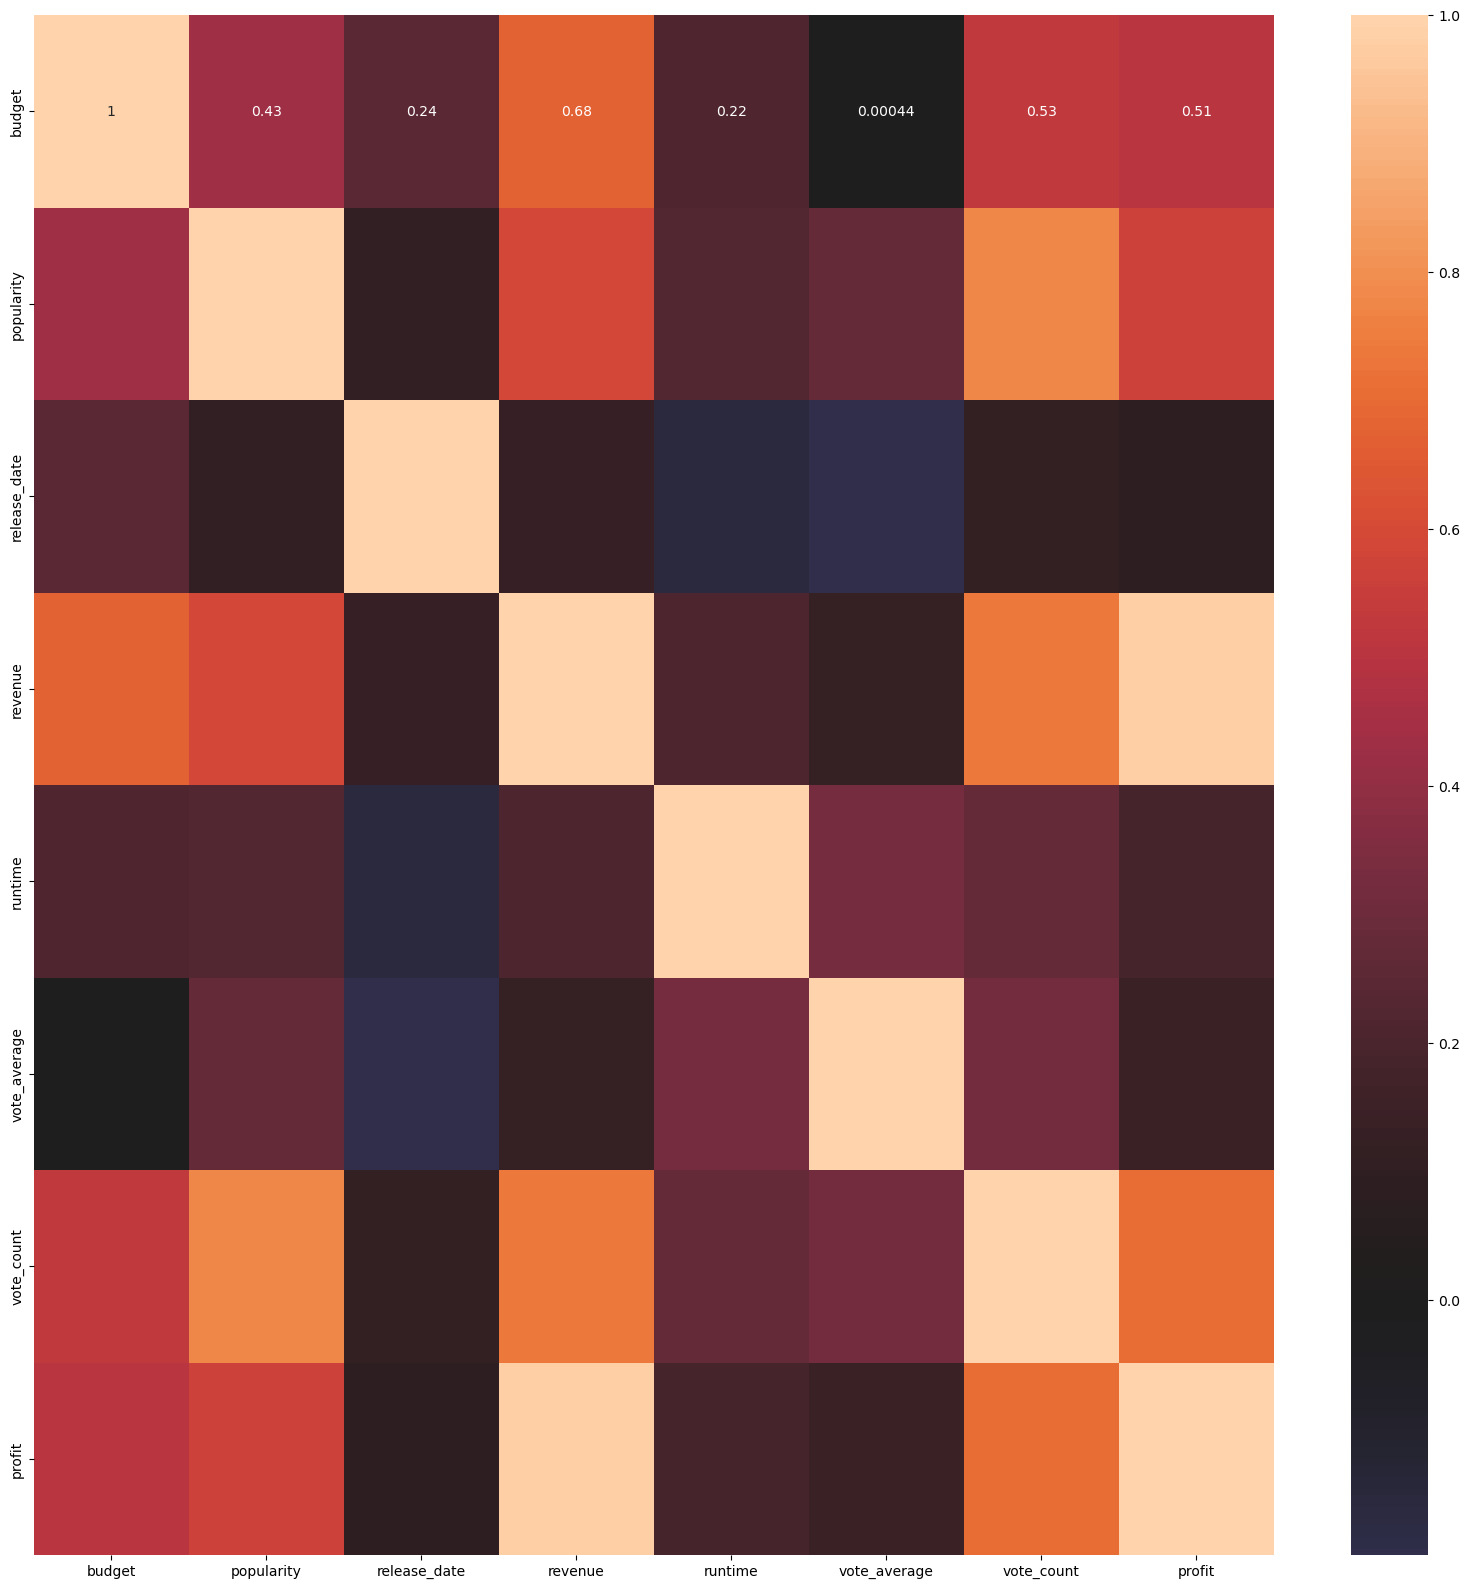

In [142]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

In [143]:
# 💡 Franja: Escalamiento de variables numéricas con StandardScaler
# Objetivo: Estandarizar datos numéricos para clustering y reducción de dimensionalidad

from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
variables_escaladas = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity', 'profit']

# Filtramos solo las películas con datos válidos en presupuesto e ingresos
df_cluster = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado y guardamos en un nuevo DataFrame
X_scaled = scaler.fit_transform(df_cluster[variables_escaladas])

# Creamos un DataFrame escalado con los mismos nombres de columnas
df_scaled = pd.DataFrame(X_scaled, columns=variables_escaladas, index=df_cluster.index)
df_scaled.to_csv("Dataset_Peliculas_Estandarizado.csv", index=False)

# Verificamos resultado
df_scaled.info()
df_scaled.describe()
df_scaled.head()


<class 'pandas.core.frame.DataFrame'>
Index: 4788 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4788 non-null   float64
 1   revenue       4788 non-null   float64
 2   runtime       4788 non-null   float64
 3   vote_average  4788 non-null   float64
 4   vote_count    4788 non-null   float64
 5   popularity    4788 non-null   float64
 6   profit        4788 non-null   float64
dtypes: float64(7)
memory usage: 299.2 KB


budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

# Clustering
## Reducción de la dimensionalidad


In [144]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

## Reducción con PCA

In [145]:
pca = PCA().fit(X_scaled)
eigenvalues = pca.explained_variance_
componentes = np.sum(eigenvalues > 1)
print(componentes)
varianzas_explicativas = pca.explained_variance_ratio_
print("Las varianzas explicativas de los coponentes son: {}".format(varianzas_explicativas))

2
Las varianzas explicativas de los coponentes son: [5.41182316e-01 1.76863955e-01 1.11712853e-01 7.54824462e-02
 6.80683669e-02 2.66900635e-02 2.57892944e-33]


In [146]:
pca = PCA(n_components=componentes)
pca.fit(X_scaled)
PCA_ds = pd.DataFrame(pca.transform(X_scaled), columns=(["col1","col2"]))
PCA_ds.describe()
PCA_ds.to_csv('data_reduccion_PCA.csv',index=False)

## Reducción TSNE

In [147]:
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)
TSNE_ds = pd.DataFrame(X_tsne,columns=(["col1","col2"]))
TSNE_ds.to_csv('data_reduccion_TSNE.csv',index=False)

## Reducción UMAP

In [148]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
UMAP_ds = pd.DataFrame(X_umap,columns=(["col1","col2"]))
UMAP_ds.to_csv('data_reduccion_UMAP.csv',index=False)

c:\Users\57311\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## K-Means con PCA

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [150]:
PCA_ds = pd.read_csv('data_reduccion_PCA.csv',sep=',')
PCA_ds.head()

col1      col2
0  24.885150 -5.773971
1  10.685793 -1.138950
2   9.140041 -1.652615
3  12.603181 -0.774766
4   3.538913 -0.834590

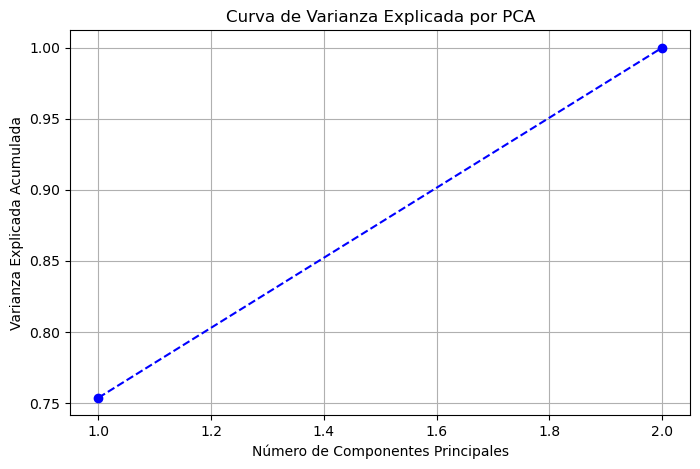

col1    0.753687
col2    1.000000
dtype: float64


In [151]:
varianza_explicada = np.var(PCA_ds, axis=0) / np.var(PCA_ds, axis=0).sum()
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada por PCA')
plt.grid(True)
plt.show()

print(varianza_acumulada)

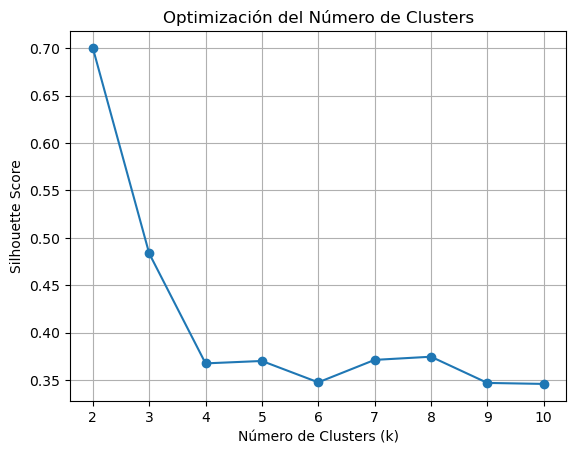

In [152]:
PCA_ds = PCA_ds.iloc[:,:3]
scores = []
rango_k = range(2, 11)
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(PCA_ds) 
    score = silhouette_score(PCA_ds, etiquetas)  
    scores.append(score)

plt.plot(rango_k, scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimización del Número de Clusters')
plt.grid(True)
plt.show()

In [153]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(PCA_ds) 
score = silhouette_score(PCA_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(PCA_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
PCA_ds['Cluster'] = etiquetas
df_scaled['Cluster'] = etiquetas

Silhouette score = 0.7003368463960661
Davies-Bouldin Index - KMeans: 0.6348481553026377


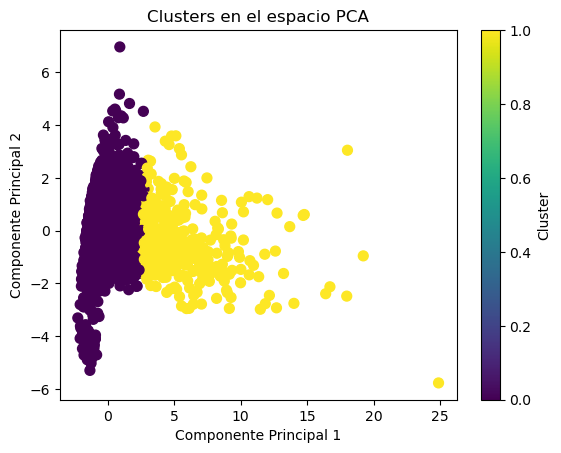

In [154]:
x = PCA_ds.iloc[:, 0] 
y = PCA_ds.iloc[:, 1]  

plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

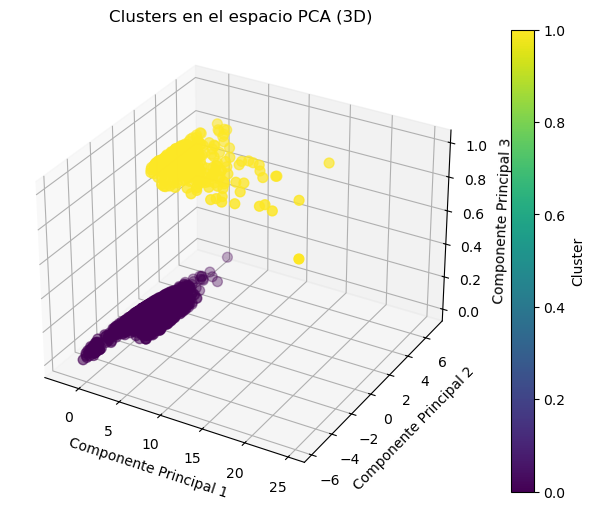

In [155]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_ds.iloc[:, 0]  
y = PCA_ds.iloc[:, 1]  
z = PCA_ds.iloc[:, 2]  

scatter = ax.scatter(x, y, z, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

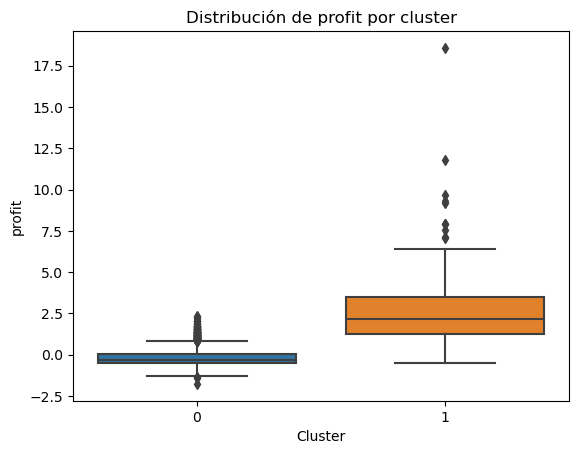

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


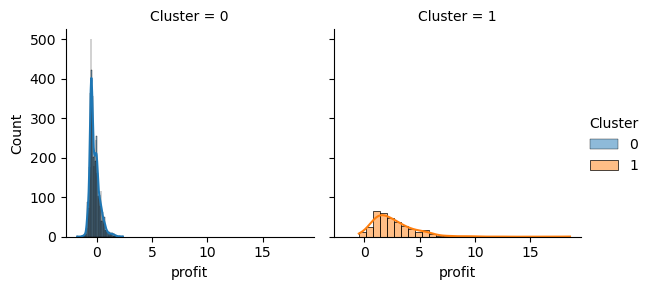

In [156]:
sns.boxplot(x='Cluster', y='profit', data=df_scaled)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(df_scaled, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

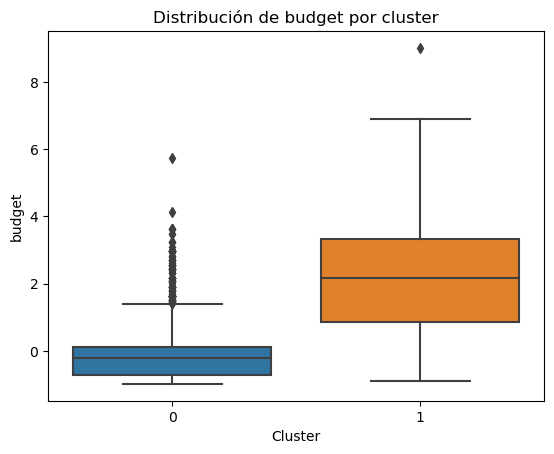

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


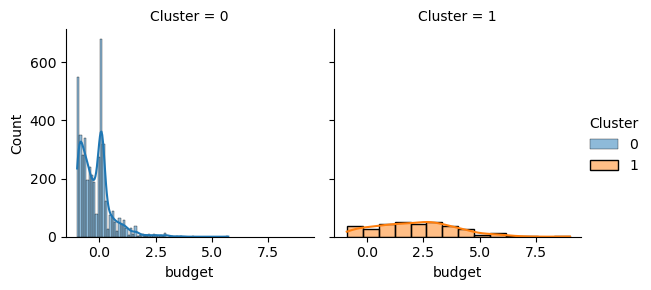

In [157]:
sns.boxplot(x='Cluster', y='budget', data=df_scaled)
plt.title('Distribución de budget por cluster')
plt.show()

g = sns.FacetGrid(df_scaled, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "budget", kde=True).add_legend()
plt.show()

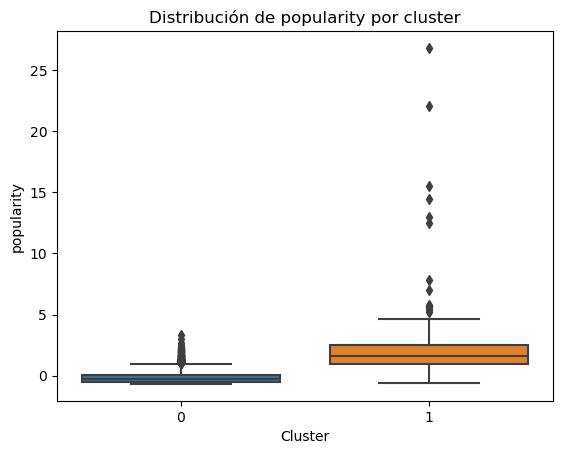

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


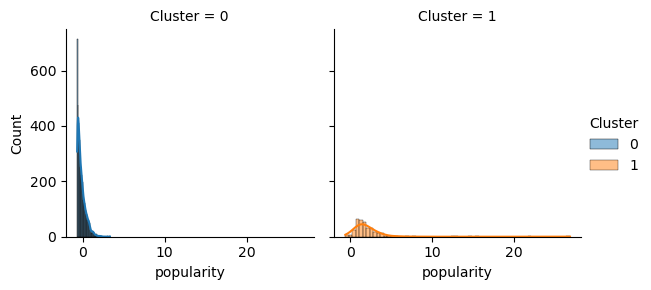

In [158]:
sns.boxplot(x='Cluster', y='popularity', data=df_scaled)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(df_scaled, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

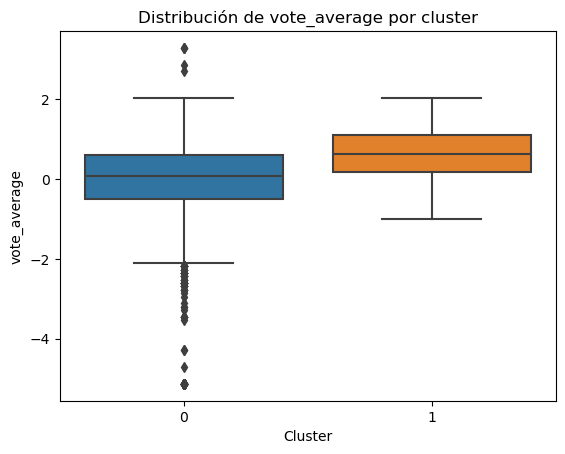

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


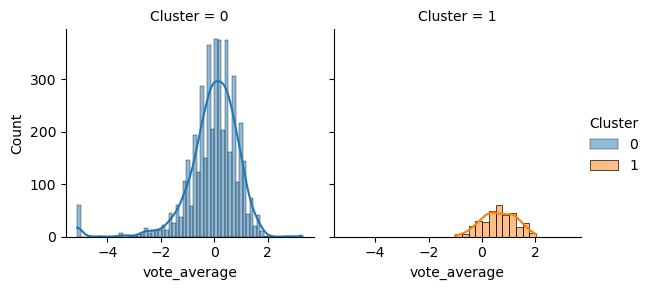

In [159]:
sns.boxplot(x='Cluster', y='vote_average', data=df_scaled)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(df_scaled, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

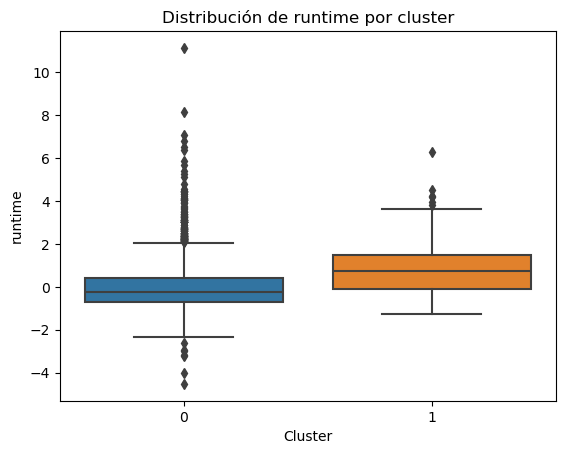

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


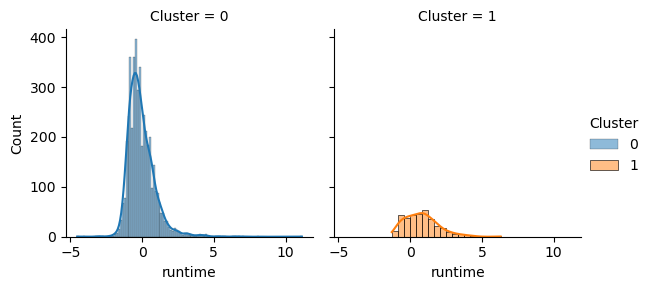

In [160]:
sns.boxplot(x='Cluster', y='runtime', data=df_scaled)
plt.title('Distribución de runtime por cluster')
plt.show()

g = sns.FacetGrid(df_scaled, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "runtime", kde=True).add_legend()
plt.show()

## K-Means con TSNE

In [168]:
TSNE_ds = pd.read_csv('data_reduccion_TSNE.csv',sep=',')
TSNE_ds.head()

col1       col2
0  77.851524   2.385391
1  76.315350  -1.828141
2  75.583790  -1.857253
3  76.508800   0.505781
4  58.744114 -17.393680

In [169]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv', sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

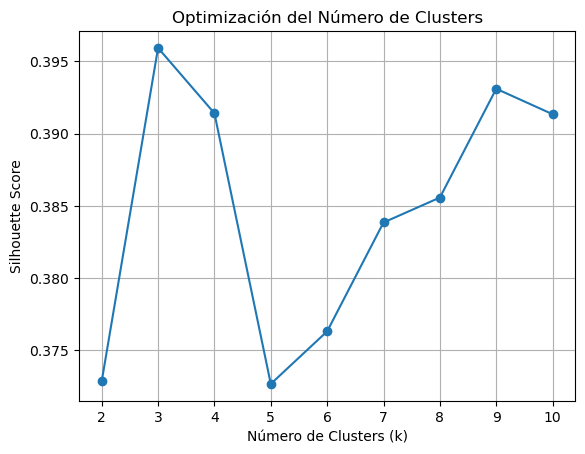

In [171]:
TSNE_ds = TSNE_ds.iloc[:,:3]
scores = []
rango_k = range(2, 11)
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(TSNE_ds) 
    score = silhouette_score(TSNE_ds, etiquetas)  
    scores.append(score)

plt.plot(rango_k, scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimización del Número de Clusters')
plt.grid(True)
plt.show()

In [172]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(TSNE_ds) 
score = silhouette_score(TSNE_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(TSNE_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
TSNE_ds['Cluster'] = etiquetas
data['Cluster'] = etiquetas

Silhouette score = 0.3959403389398356
Davies-Bouldin Index - KMeans: 0.8551666892738816


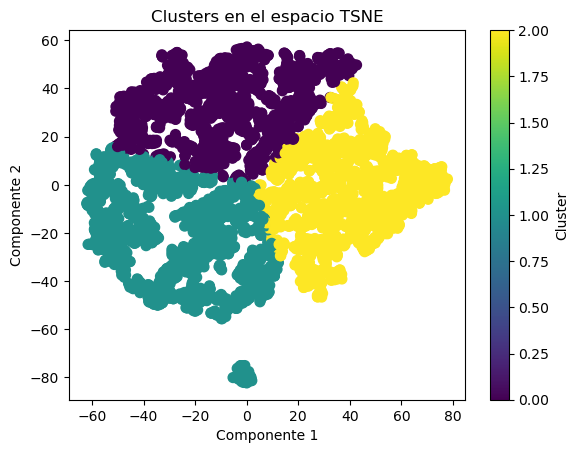

In [173]:
x = TSNE_ds.iloc[:, 0] 
y = TSNE_ds.iloc[:, 1]  

plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio TSNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

In [174]:
df_scaled.describe()
df_scaled.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  Cluster  
0  18.579924        1  
1   4.420685        1  
2   4.230952        1  
3   5.723801        1  
4  -0.350550        1

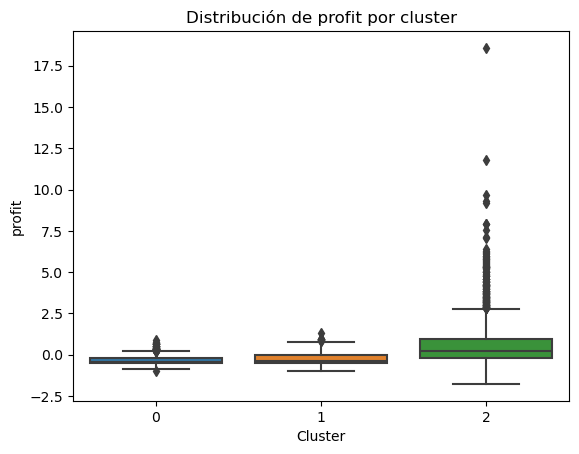

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


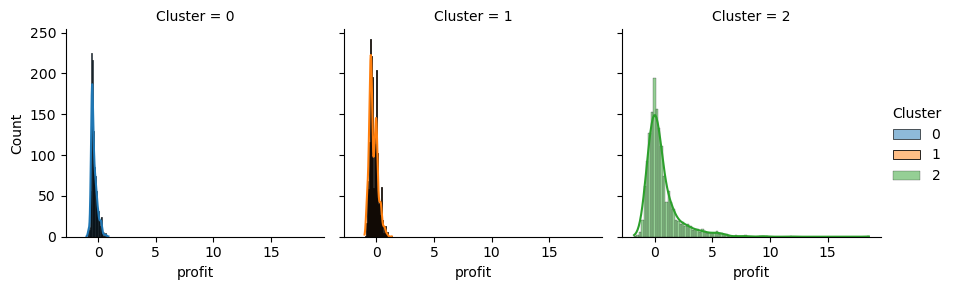

In [176]:
sns.boxplot(x='Cluster', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

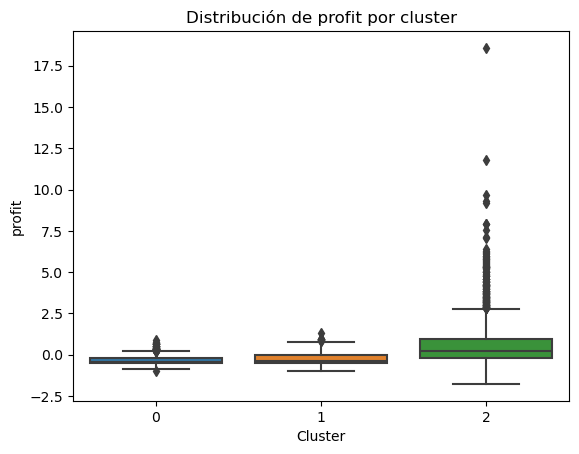

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


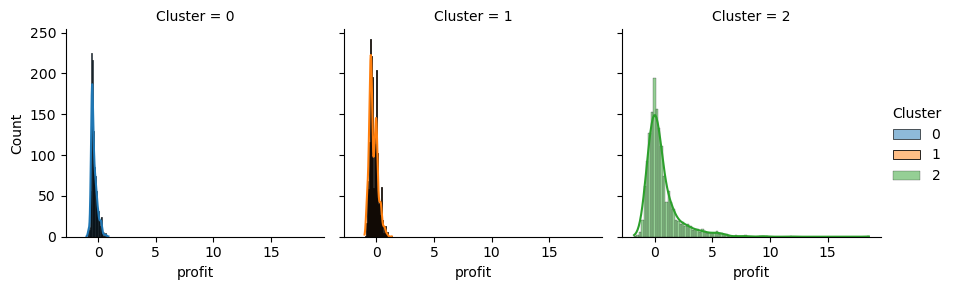

In [177]:
sns.boxplot(x='Cluster', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

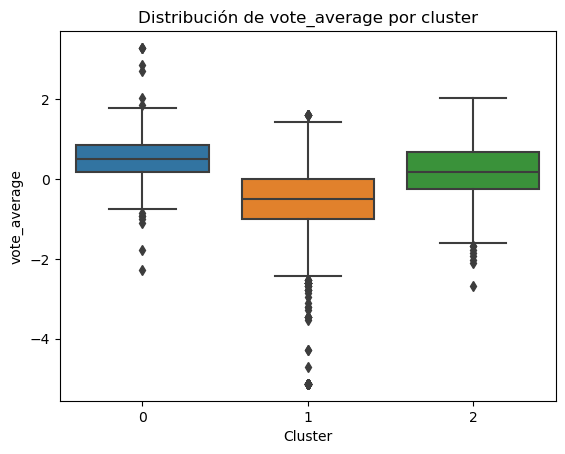

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


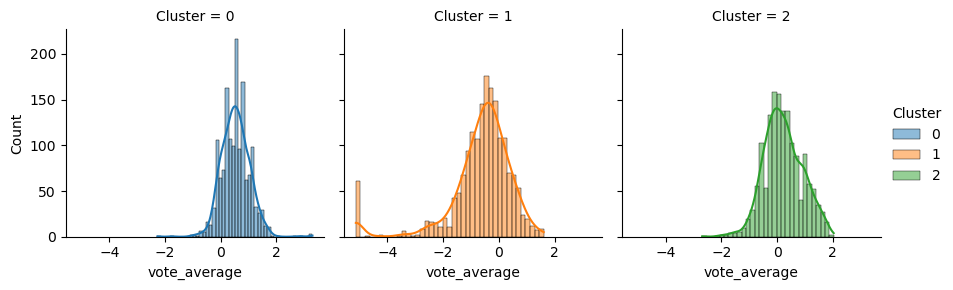

In [178]:
sns.boxplot(x='Cluster', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

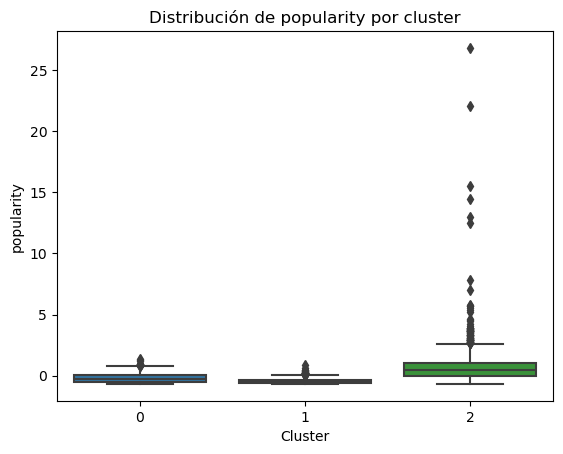

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


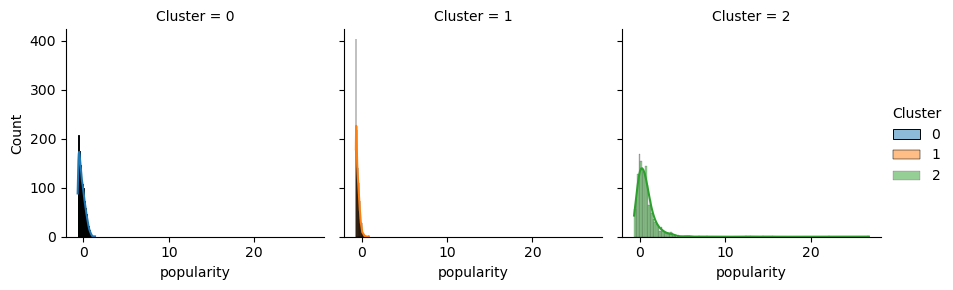

In [179]:
sns.boxplot(x='Cluster', y='popularity', data=data)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

## K-Means con UPMAP

In [180]:
UMAP_ds = pd.read_csv('data_reduccion_UMAP.csv',sep=',')
UMAP_ds.head()

col1      col2
0  12.779681  2.420979
1  12.652773  2.401349
2  12.613903  2.412118
3  12.749394  2.439888
4  11.071385  4.302543

In [181]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

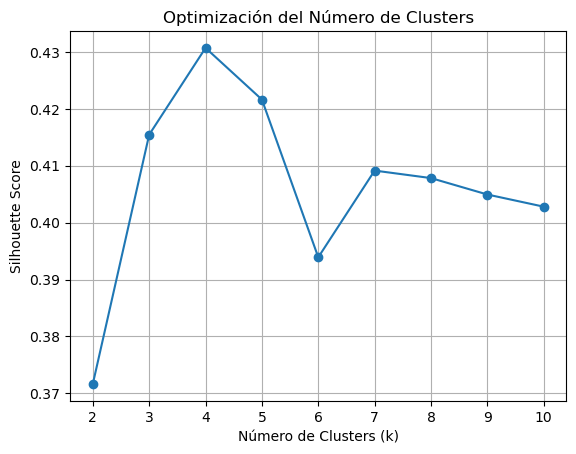

In [182]:
UMAP_ds = UMAP_ds.iloc[:,:3]
scores = []
rango_k = range(2, 11)
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = kmeans.fit_predict(UMAP_ds) 
    score = silhouette_score(UMAP_ds, etiquetas)  
    scores.append(score)

plt.plot(rango_k, scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimización del Número de Clusters')
plt.grid(True)
plt.show()

In [183]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
etiquetas = kmeans.fit_predict(UMAP_ds) 
score = silhouette_score(UMAP_ds, etiquetas)
print(f"Silhouette score = {score}")
dbi_kmeans = davies_bouldin_score(UMAP_ds, etiquetas)
print(f"Davies-Bouldin Index - KMeans: {dbi_kmeans}")
UMAP_ds['Cluster'] = etiquetas
data['Cluster'] = etiquetas

Silhouette score = 0.43071318597239777
Davies-Bouldin Index - KMeans: 0.6663859047259096


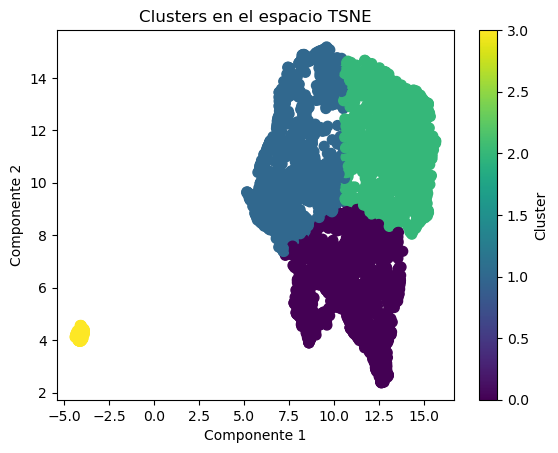

In [184]:
x = UMAP_ds.iloc[:, 0] 
y = UMAP_ds.iloc[:, 1]  

plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio TSNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

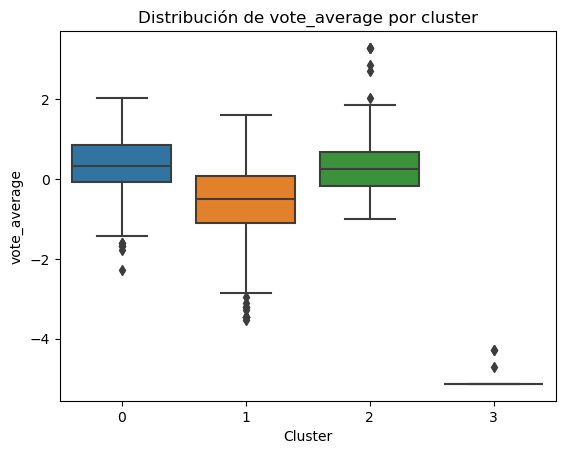

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

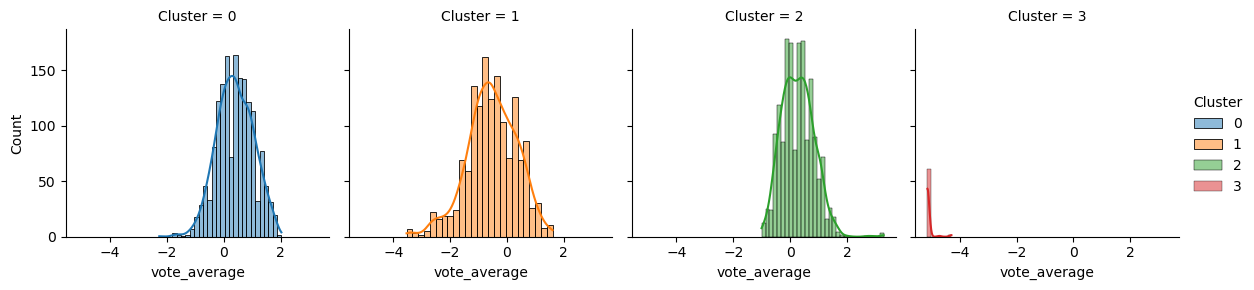

In [185]:
sns.boxplot(x='Cluster', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

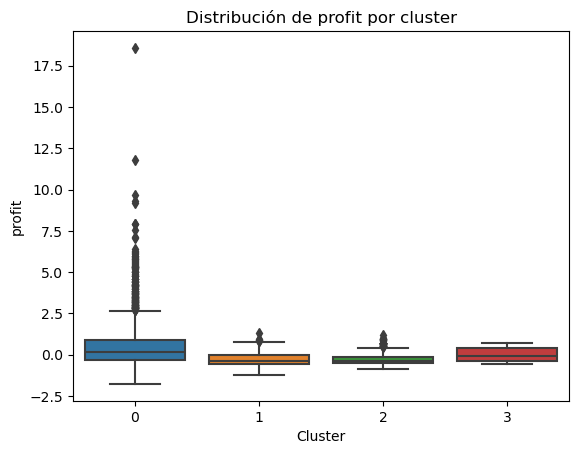

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

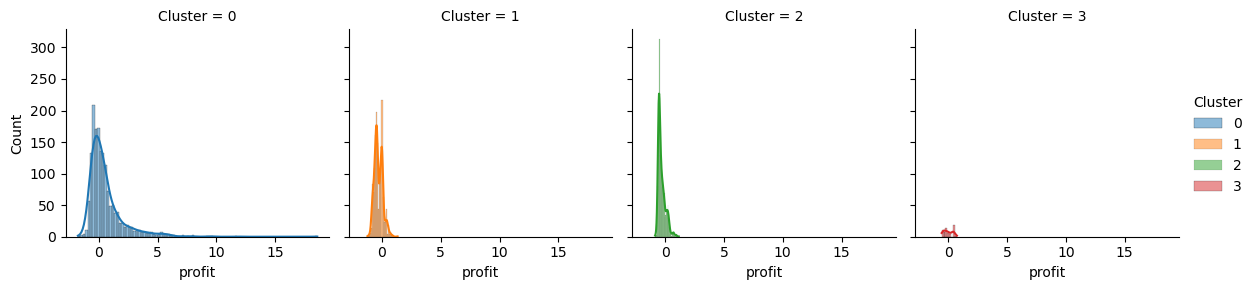

In [186]:
sns.boxplot(x='Cluster', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

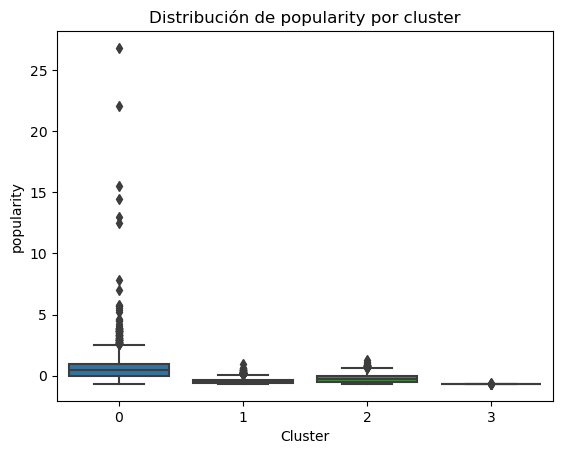

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

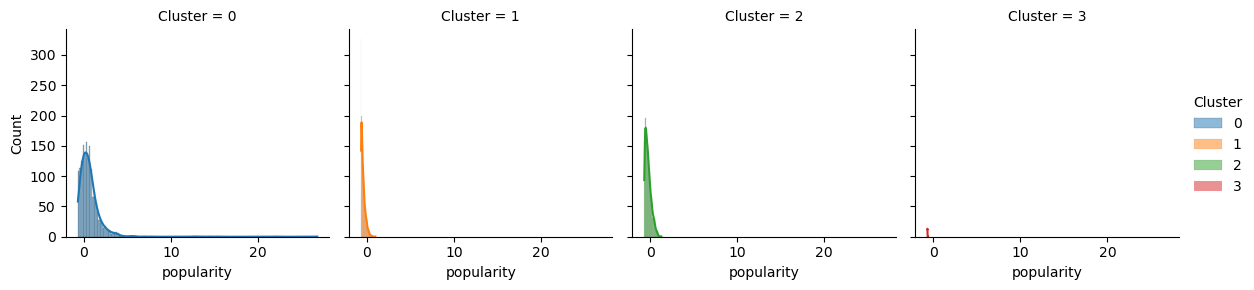

In [187]:
sns.boxplot(x='Cluster', y='popularity', data=data)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

## Aglomerativo con PCA

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

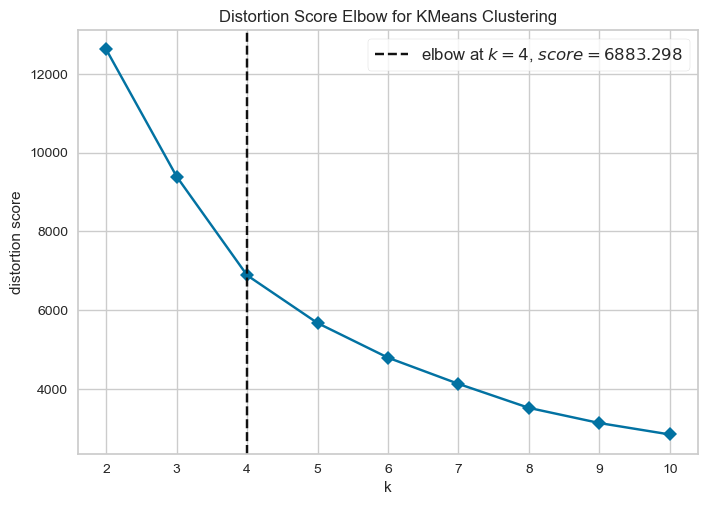

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [190]:
modelo = KMeans(n_clusters=2, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(PCA_ds)
codo.show()

In [193]:
AC = AgglomerativeClustering(n_clusters=4)
predicciones = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = predicciones
data["Clusters"]= predicciones

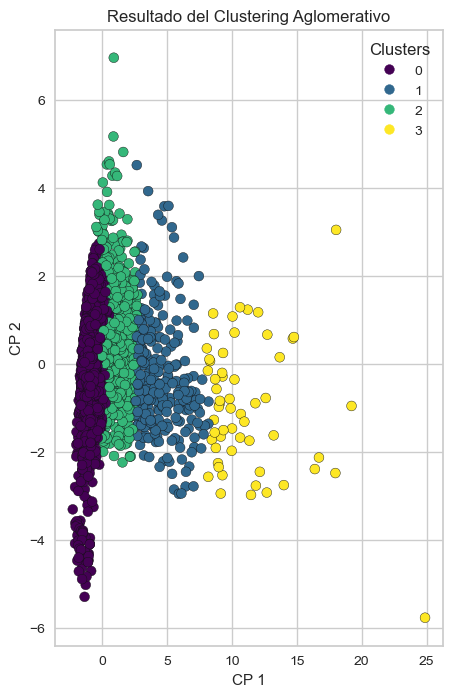

In [197]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(PCA_ds['col1'], PCA_ds['col2'],
                     c=PCA_ds['Clusters'], cmap='viridis', edgecolor='k', s=50)

ax.set_title('Resultado del Clustering Aglomerativo')
ax.set_xlabel('CP 1')
ax.set_ylabel('CP 2')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

In [198]:
import plotly.express as px
fig=px.scatter(PCA_ds,x="col1",y="col2",color='Clusters',size_max=8,opacity=0.7)
fig.update_layout(title="Resultado del Clustering Aglomerativo",
                 scene=dict(xaxis_title='CP1',yaxis_title='CP2',))
fig.show()

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



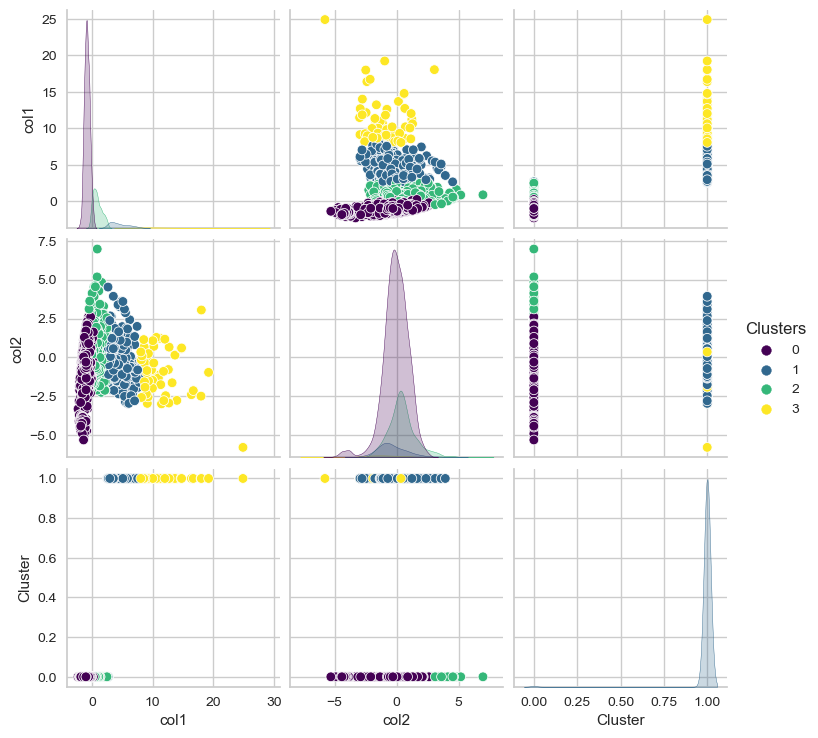

In [199]:
sns.pairplot(PCA_ds, hue='Clusters', palette='viridis', markers='o')
plt.show()

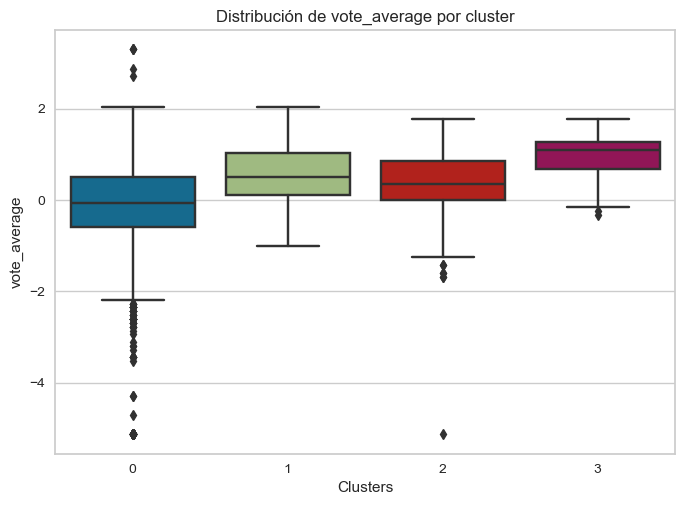

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



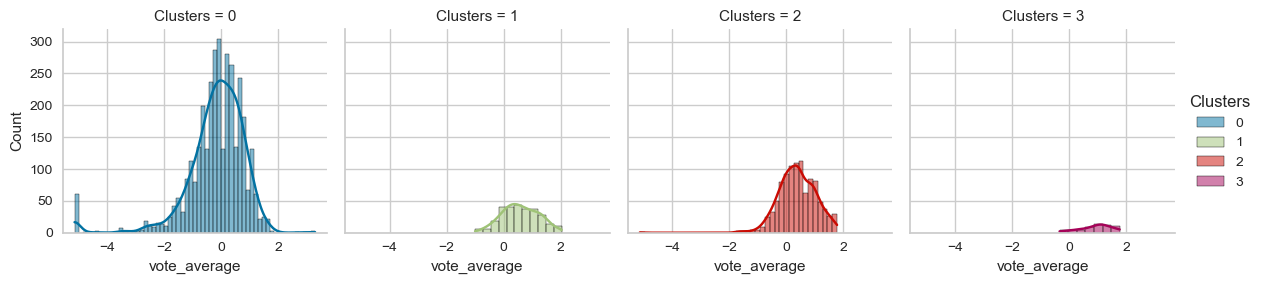

In [201]:
sns.boxplot(x='Clusters', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

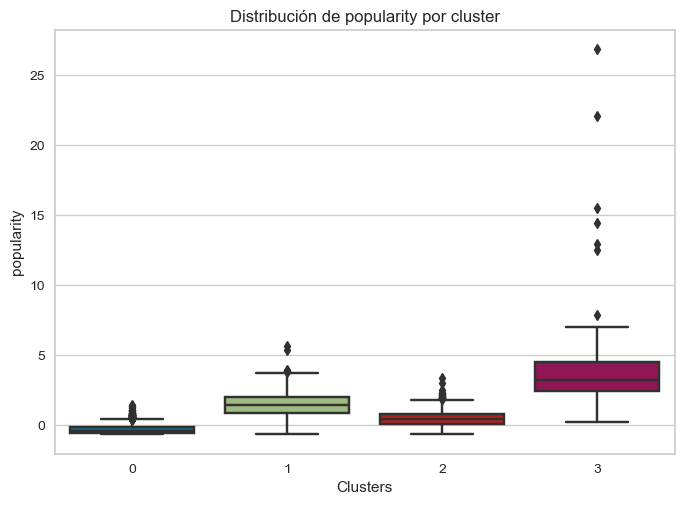

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



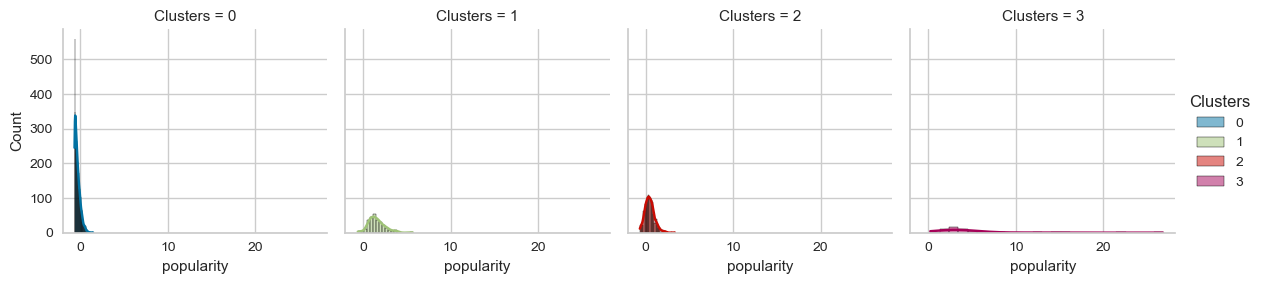

In [202]:
sns.boxplot(x='Clusters', y='popularity', data=data)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

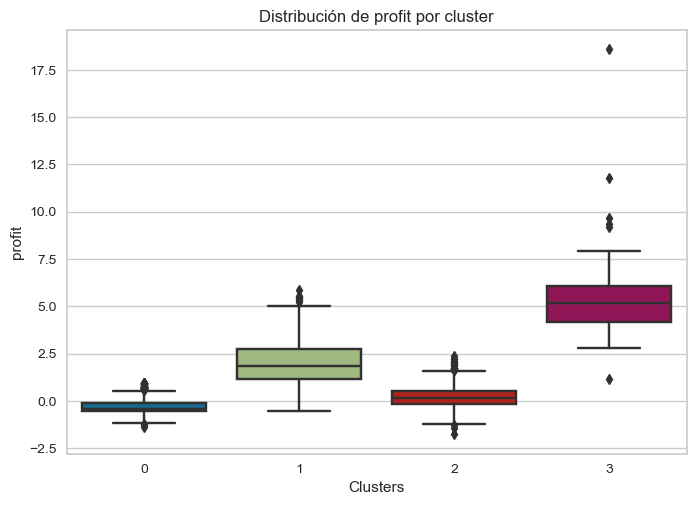

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



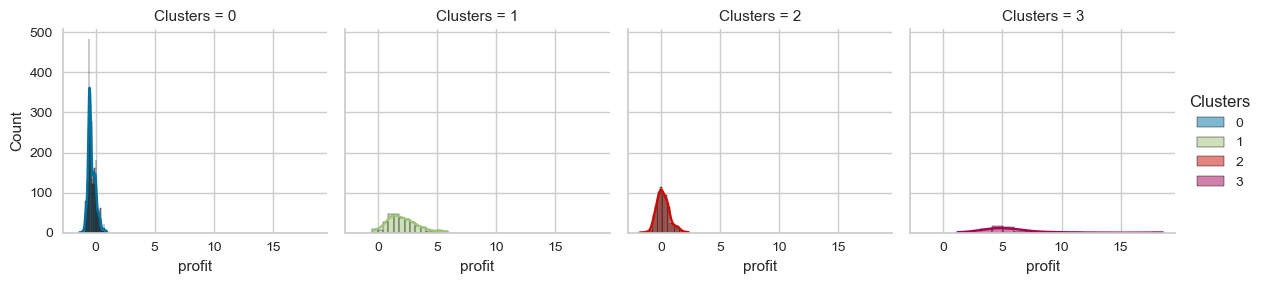

In [203]:
sns.boxplot(x='Clusters', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

In [204]:
score = silhouette_score(PCA_ds, AC.labels_)
print(f"Coeficiente de Silueta={score}")

Coeficiente de Silueta=0.5436778719113932


In [205]:
dbi_agglo = davies_bouldin_score(PCA_ds, modelo.labels_)
print(f"Davies-Bouldin Index - Aglomerativo: {dbi_agglo}")

Davies-Bouldin Index - Aglomerativo: 0.9277441281675524


## Aglomerativo con TSNE

In [207]:
TSNE_ds = pd.read_csv('data_reduccion_TSNE.csv',sep=',')
TSNE_ds.head()

col1       col2
0  77.851524   2.385391
1  76.315350  -1.828141
2  75.583790  -1.857253
3  76.508800   0.505781
4  58.744114 -17.393680

In [210]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

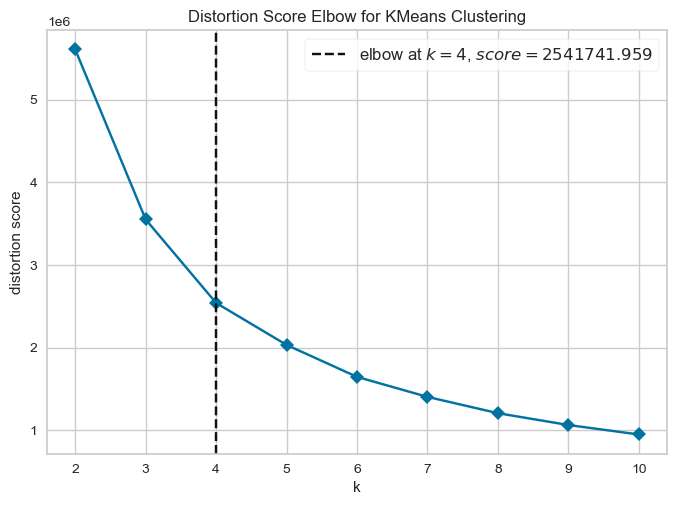

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [211]:
modelo = KMeans(n_clusters=2, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(TSNE_ds)
codo.show()

In [212]:
AC = AgglomerativeClustering(n_clusters=4)
predicciones = AC.fit_predict(TSNE_ds)
TSNE_ds["Clusters"] = predicciones
data["Clusters"]= predicciones

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



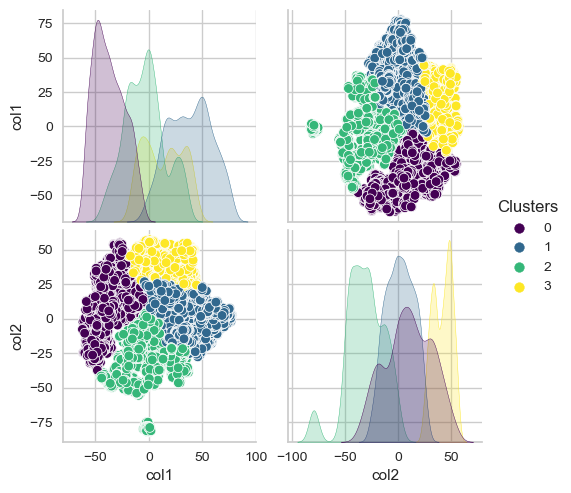

In [214]:
sns.pairplot(TSNE_ds, hue='Clusters', palette='viridis', markers='o')
plt.show()

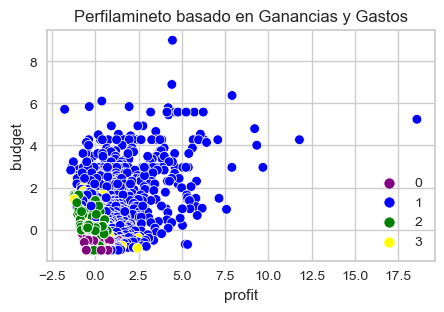

In [223]:
plt.figure(figsize=(5,3)) 
pl = sns.scatterplot(data = data,x=data["profit"], y=data["budget"],hue=data["Clusters"],
                     palette=['Purple','Blue','Green','Yellow'])
pl.set_title("Perfilamineto basado en Ganancias y Gastos")
plt.legend()
plt.show()

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1826: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1877: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

<Figure size 500x300 with 0 Axes>

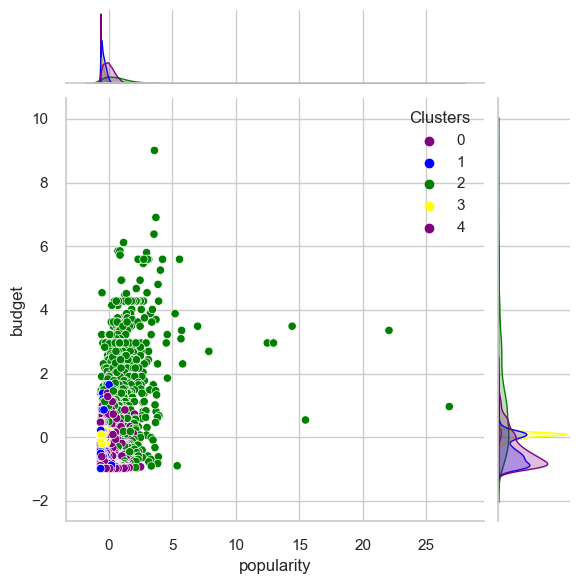

In [240]:
plt.figure(figsize=(5,3)) 
sns.set(style="whitegrid")
g = sns.jointplot(x="popularity", y="budget", data=data,hue="Clusters", kind="scatter",
                 palette=['Purple','Blue','Green','Yellow'])
plt.show()

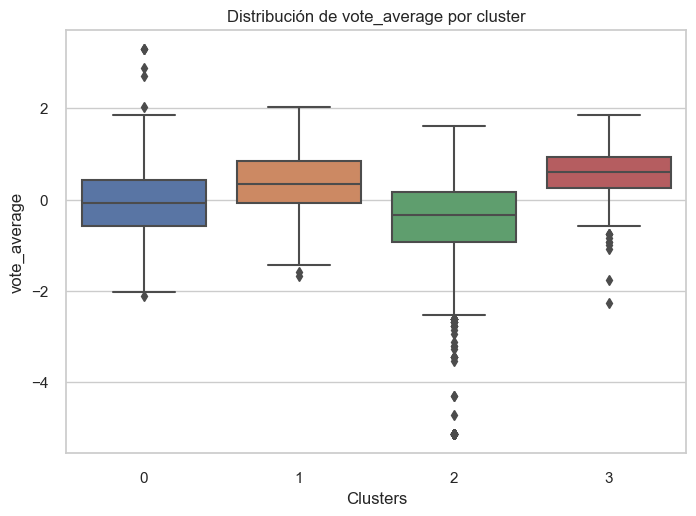

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



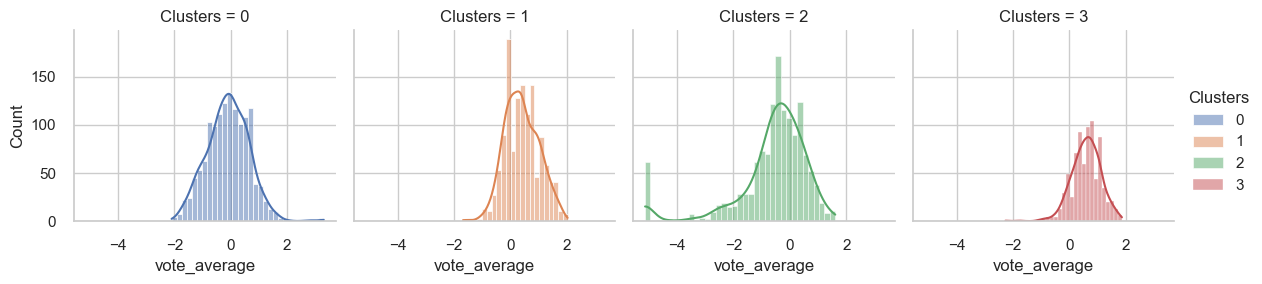

In [225]:
sns.boxplot(x='Clusters', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

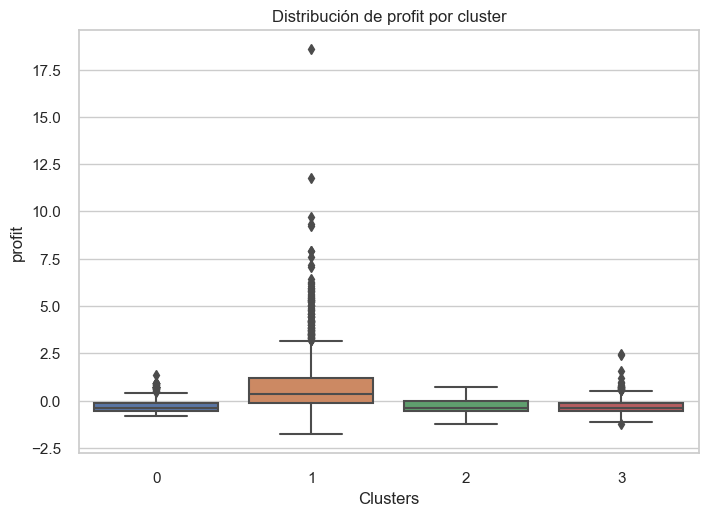

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



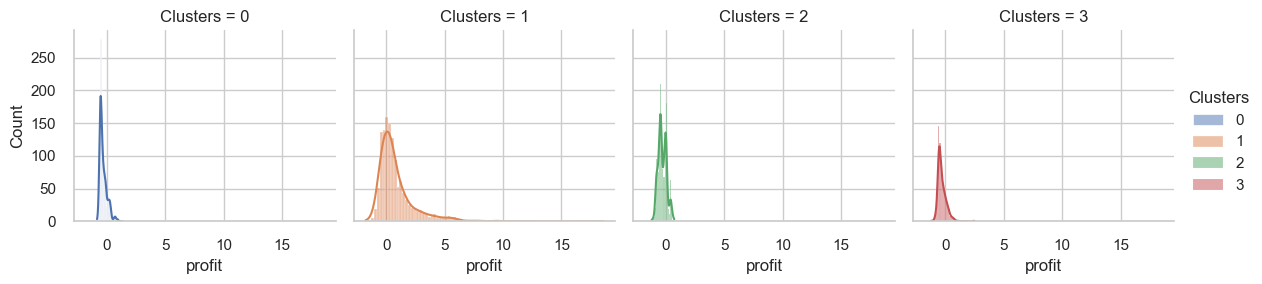

In [226]:
sns.boxplot(x='Clusters', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

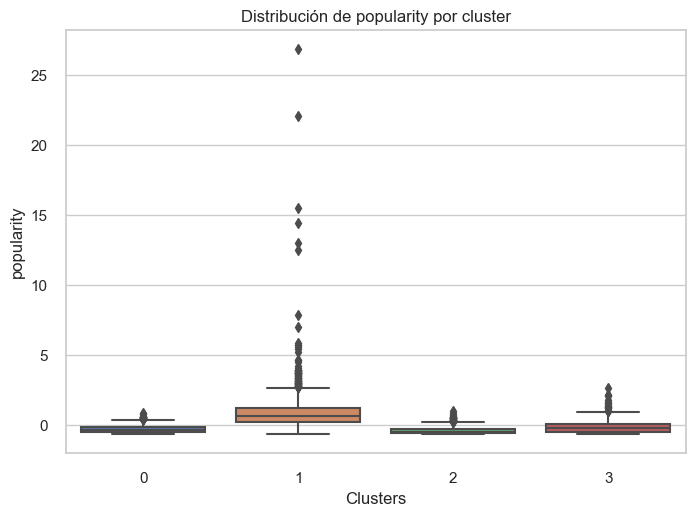

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



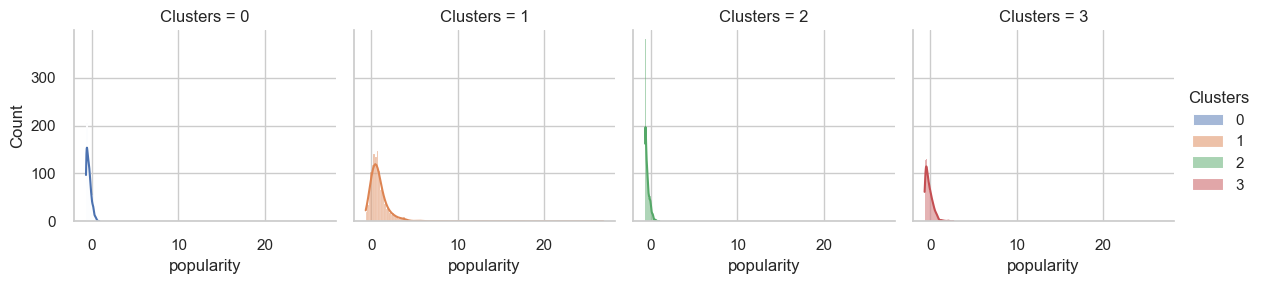

In [227]:
sns.boxplot(x='Clusters', y='popularity', data=data)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

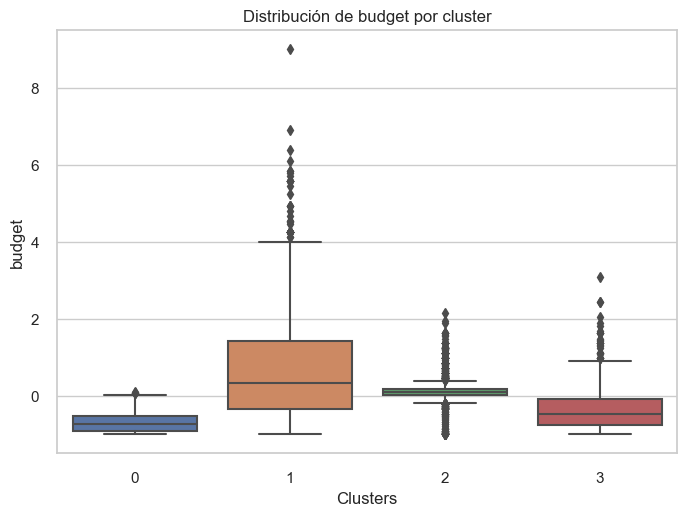

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



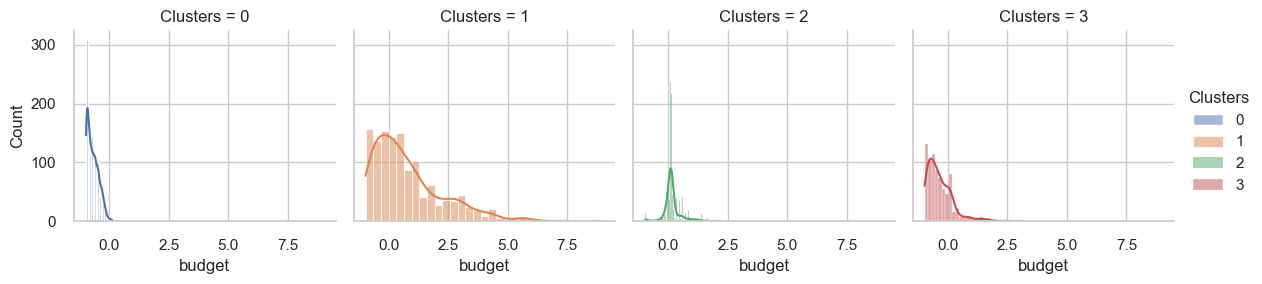

In [228]:
sns.boxplot(x='Clusters', y='budget', data=data)
plt.title('Distribución de budget por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "budget", kde=True).add_legend()
plt.show()

In [229]:
score = silhouette_score(TSNE_ds, AC.labels_)
print(f"Coeficiente de Silueta={score}")

Coeficiente de Silueta=0.35185573305212503


In [230]:
dbi_agglo = davies_bouldin_score(PCA_ds, modelo.labels_)
print(f"Davies-Bouldin Index - Aglomerativo: {dbi_agglo}")

Davies-Bouldin Index - Aglomerativo: 2.5598880732767304


## Aglomerativo con UMAP

In [231]:
UMAP_ds = pd.read_csv('data_reduccion_UMAP.csv',sep=',')
UMAP_ds.head()

col1      col2
0  12.779681  2.420979
1  12.652773  2.401349
2  12.613903  2.412118
3  12.749394  2.439888
4  11.071385  4.302543

In [232]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

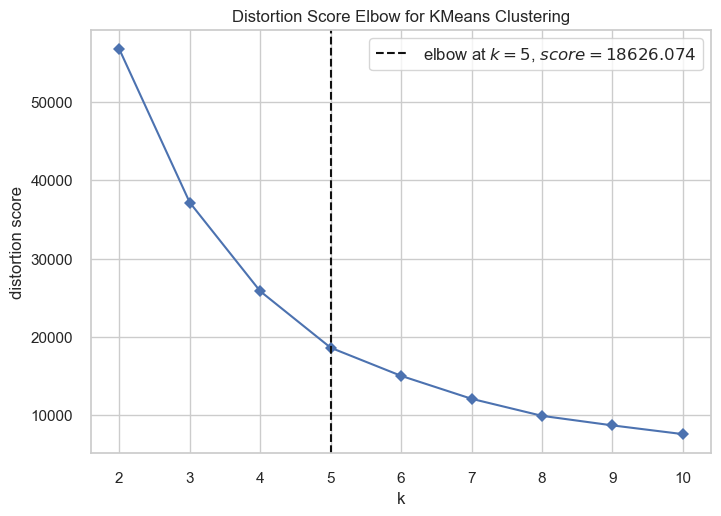

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [233]:
modelo = KMeans(n_clusters=2, random_state=42, n_init=10)
codo = KElbowVisualizer(modelo, k=10, timings=False)
codo.fit(UMAP_ds)
codo.show()

In [234]:
AC = AgglomerativeClustering(n_clusters=5)
predicciones = AC.fit_predict(UMAP_ds)
UMAP_ds["Clusters"] = predicciones
data["Clusters"]= predicciones

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



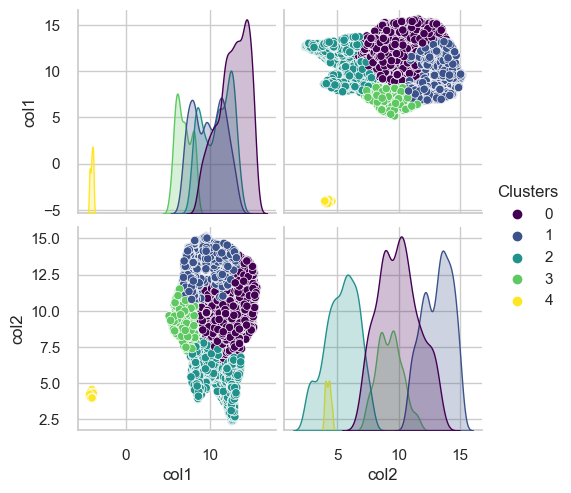

In [236]:
sns.pairplot(UMAP_ds, hue='Clusters', palette='viridis', markers='o')
plt.show()

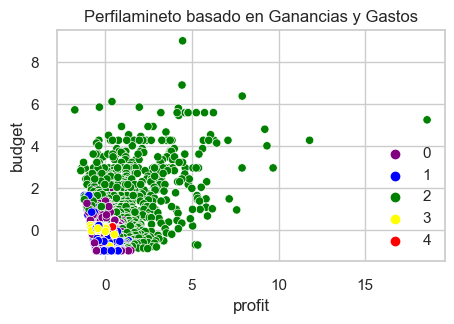

In [237]:
plt.figure(figsize=(5,3)) 
pl = sns.scatterplot(data = data,x=data["profit"], y=data["budget"],hue=data["Clusters"],
                     palette=['Purple','Blue','Green','Yellow','Red'])
pl.set_title("Perfilamineto basado en Ganancias y Gastos")
plt.legend()
plt.show()

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 500x300 with 0 Axes>

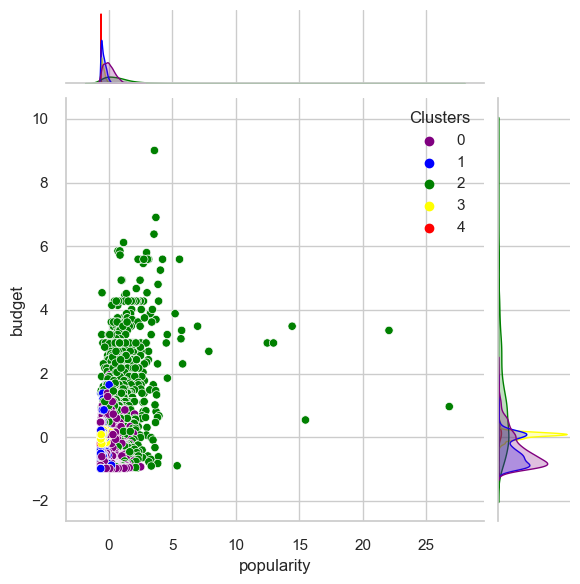

In [239]:
plt.figure(figsize=(5,3)) 
sns.set(style="whitegrid")
g = sns.jointplot(x="popularity", y="budget", data=data,hue="Clusters", kind="scatter",
                 palette=['Purple','Blue','Green','Yellow','Red'])
plt.show()

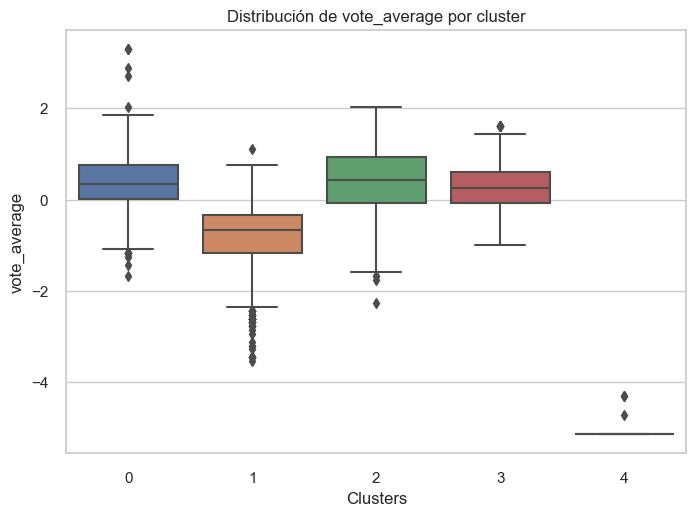

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

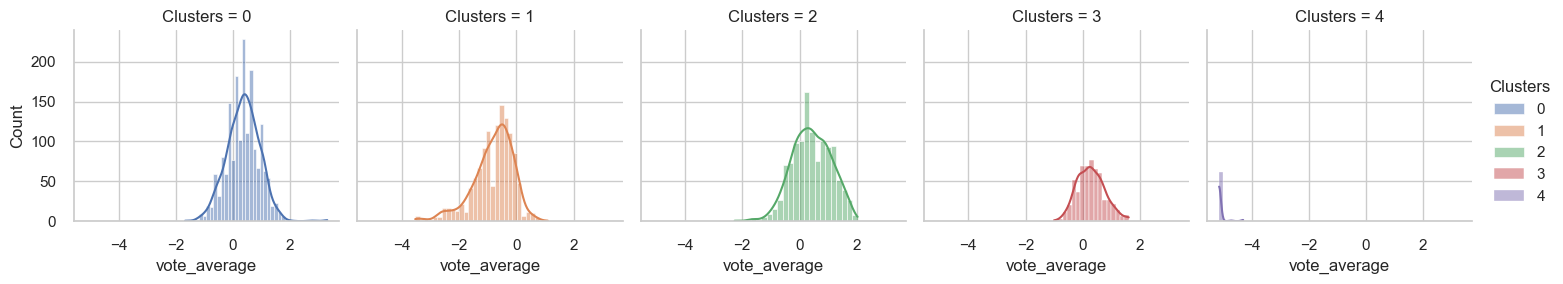

In [241]:
sns.boxplot(x='Clusters', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

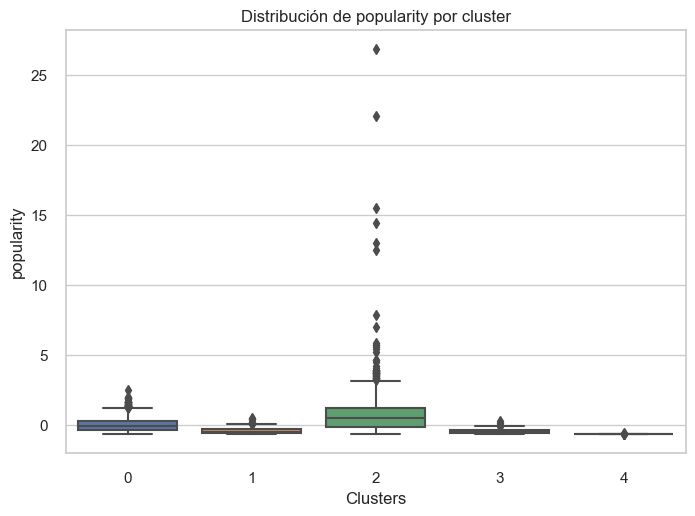

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

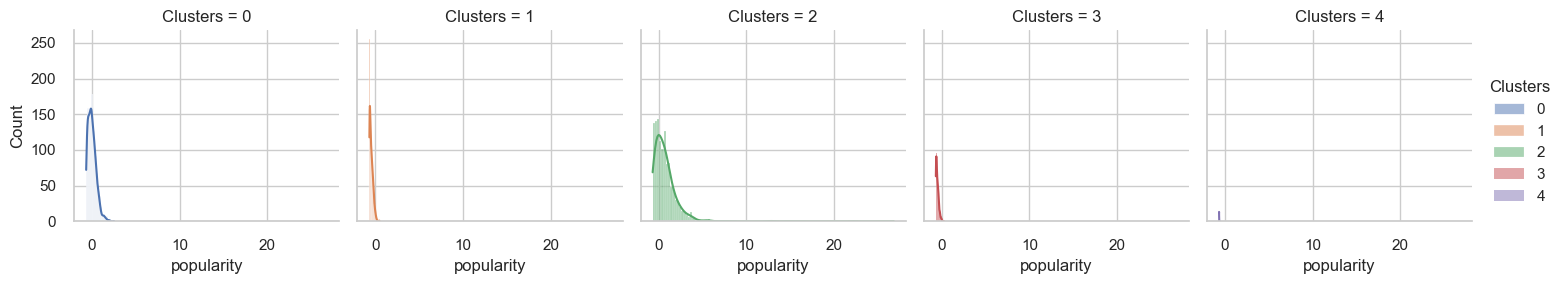

In [242]:
sns.boxplot(x='Clusters', y='popularity', data=data)
plt.title('Distribución de popularity por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "popularity", kde=True).add_legend()
plt.show()

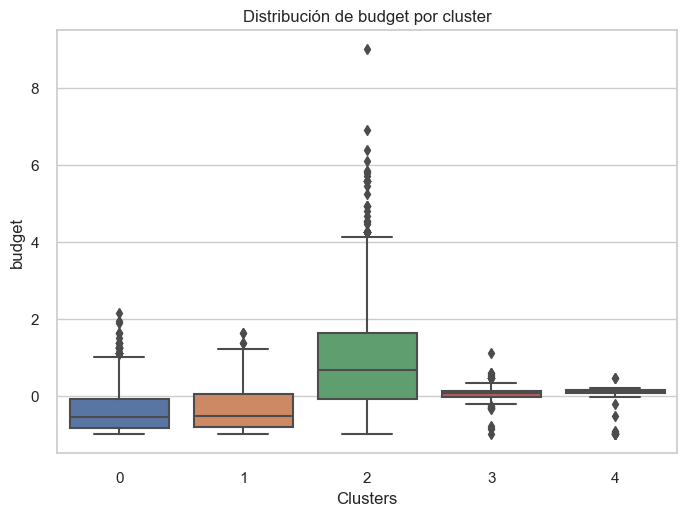

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

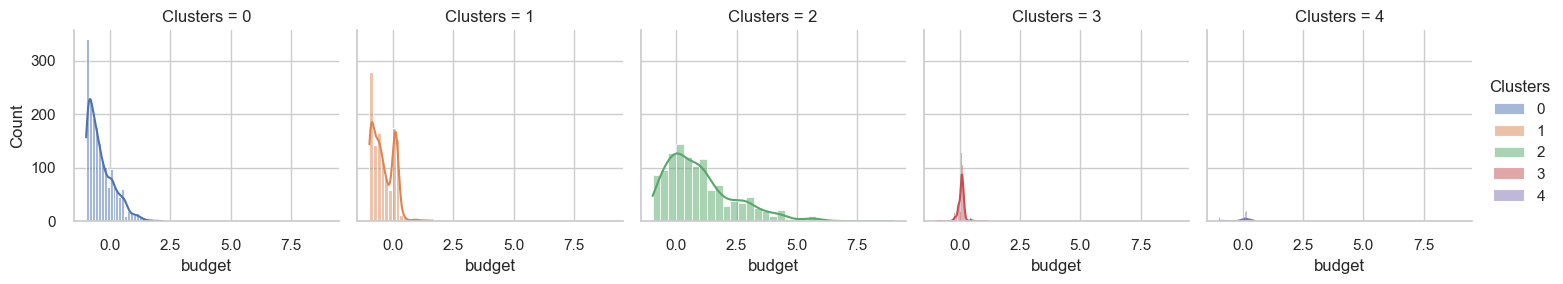

In [243]:
sns.boxplot(x='Clusters', y='budget', data=data)
plt.title('Distribución de budget por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "budget", kde=True).add_legend()
plt.show()

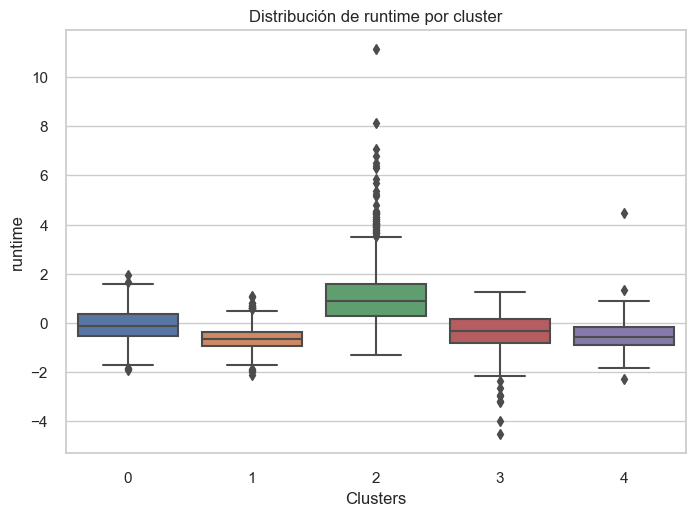

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

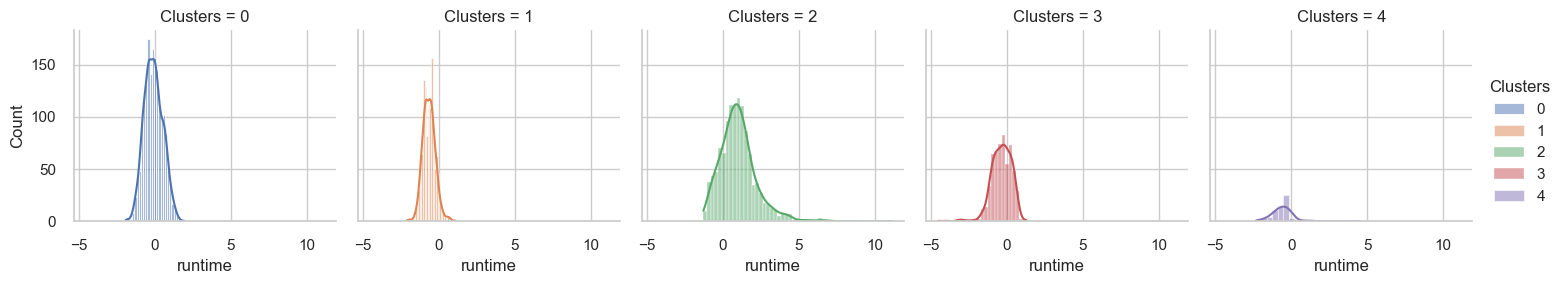

In [244]:
sns.boxplot(x='Clusters', y='runtime', data=data)
plt.title('Distribución de runtime por cluster')
plt.show()

g = sns.FacetGrid(data, col="Clusters", hue="Clusters", sharex=True, sharey=True)
g.map(sns.histplot, "runtime", kde=True).add_legend()
plt.show()

In [245]:
score = silhouette_score(UMAP_ds, AC.labels_)
print(f"Coeficiente de Silueta={score}")

Coeficiente de Silueta=0.4063432327029331


In [246]:
dbi_agglo = davies_bouldin_score(UMAP_ds, modelo.labels_)
print(f"Davies-Bouldin Index - Aglomerativo: {dbi_agglo}")

Davies-Bouldin Index - Aglomerativo: 0.751473038151518


## DBSCAN con PCA

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [248]:
PCA_ds = pd.read_csv('data_reduccion_PCA.csv',sep=',')
PCA_ds.head()

col1      col2
0  24.885150 -5.773971
1  10.685793 -1.138950
2   9.140041 -1.652615
3  12.603181 -0.774766
4   3.538913 -0.834590

In [249]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

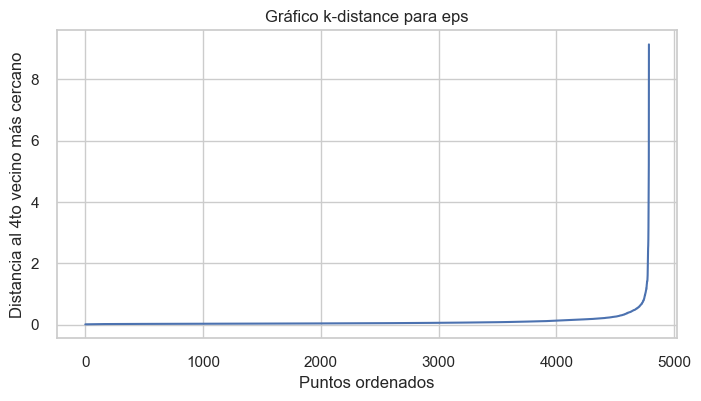

In [250]:
PCA_ds = PCA_ds.iloc[:,:3]
vecinos = NearestNeighbors(n_neighbors=5)
vecinos_ajuste = vecinos.fit(PCA_ds)
distancias, _ = vecinos_ajuste.kneighbors(PCA_ds)

distancias = np.sort(distancias[:, 4])  
plt.figure(figsize=(8, 4))
plt.plot(distancias)
plt.title("Gráfico k-distance para eps")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4to vecino más cercano")
plt.grid(True)
plt.show()

In [262]:
dbscan = DBSCAN(eps=6, min_samples=5)
etiquetas_db = dbscan.fit_predict(PCA_ds)

mask = etiquetas_db != -1
labels_filtrados = etiquetas_db[mask]
if len(set(labels_filtrados)) > 1:
    score = silhouette_score(PCA_ds[mask], labels_filtrados)
    print(f"Silhouette Score (sin outliers): {score:.2f}")
else:
    print("No hay suficientes clusters para calcular silhouette score.")
    
score = silhouette_score(PCA_ds, etiquetas_db)
print(f"Silhouette Score DBSCAN (con outliers): {score:.2f}")
dbi_dbscan = davies_bouldin_score(PCA_ds, etiquetas_db)
print(f"Davies-Bouldin Index - DBSCAN: {dbi_dbscan}")
PCA_ds['Cluster'] = etiquetas_db
data['Cluster'] = etiquetas_db

No hay suficientes clusters para calcular silhouette score.
Silhouette Score DBSCAN (con outliers): 0.91
Davies-Bouldin Index - DBSCAN: 0.06186224374219594


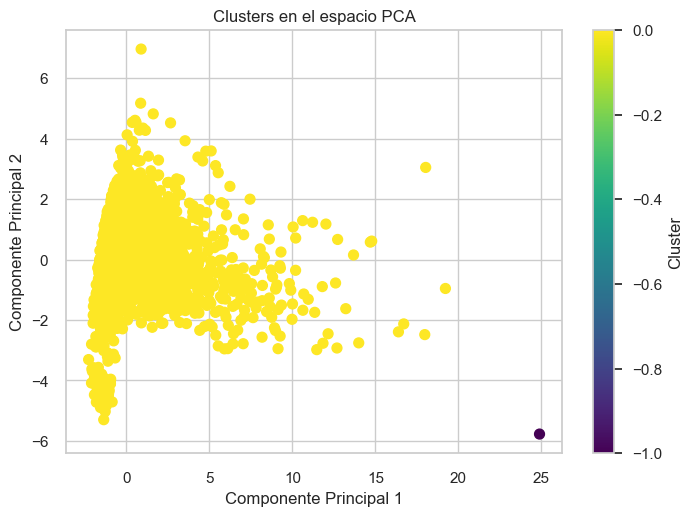

In [263]:
x = PCA_ds.iloc[:, 0] 
y = PCA_ds.iloc[:, 1]  

plt.scatter(x, y, c=dbscan.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

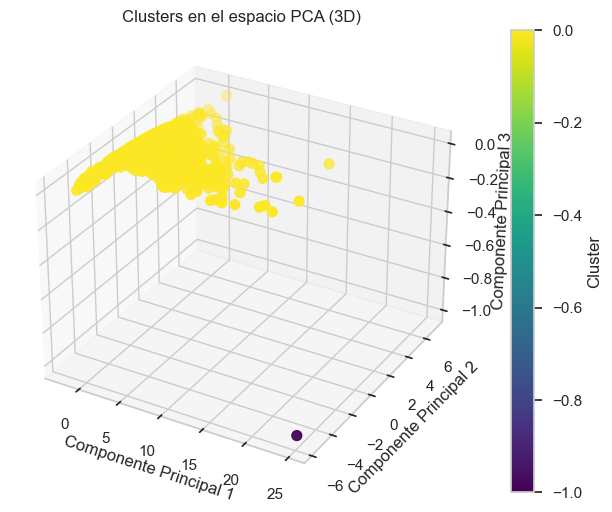

In [264]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_ds.iloc[:, 0]  
y = PCA_ds.iloc[:, 1]  
z = PCA_ds.iloc[:, 2]  

scatter = ax.scatter(x, y, z, c=dbscan.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.colorbar(scatter, label='Cluster')
plt.show()

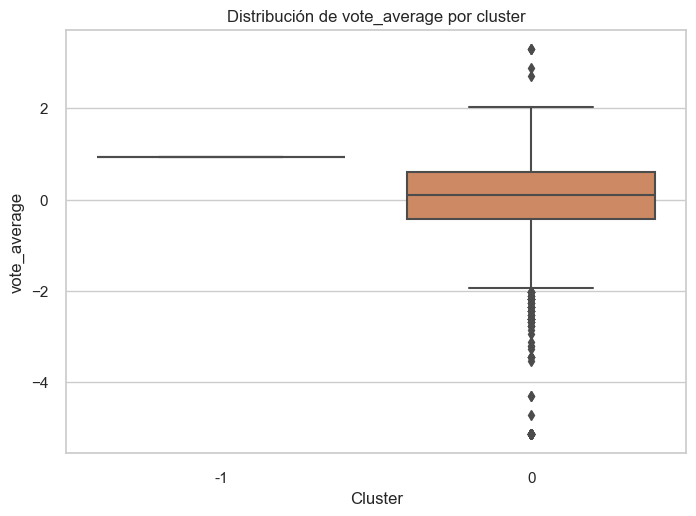

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



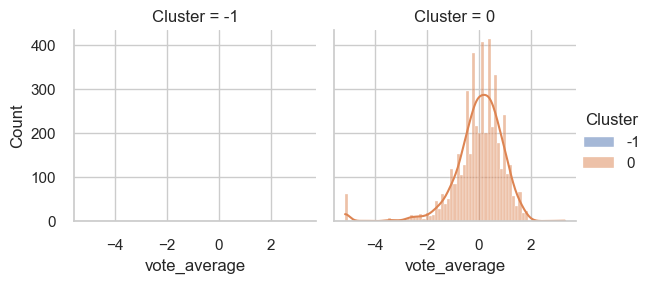

In [265]:
sns.boxplot(x='Cluster', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

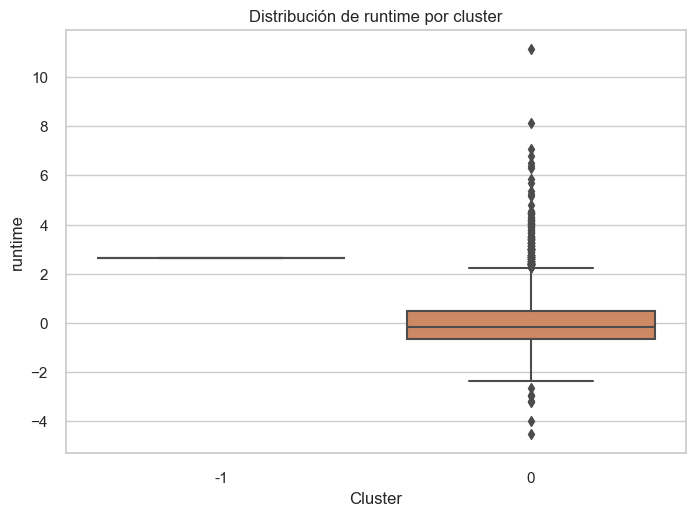

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



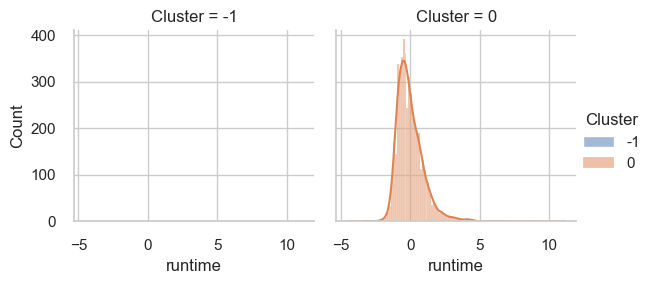

In [266]:
sns.boxplot(x='Cluster', y='runtime', data=data)
plt.title('Distribución de runtime por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "runtime", kde=True).add_legend()
plt.show()

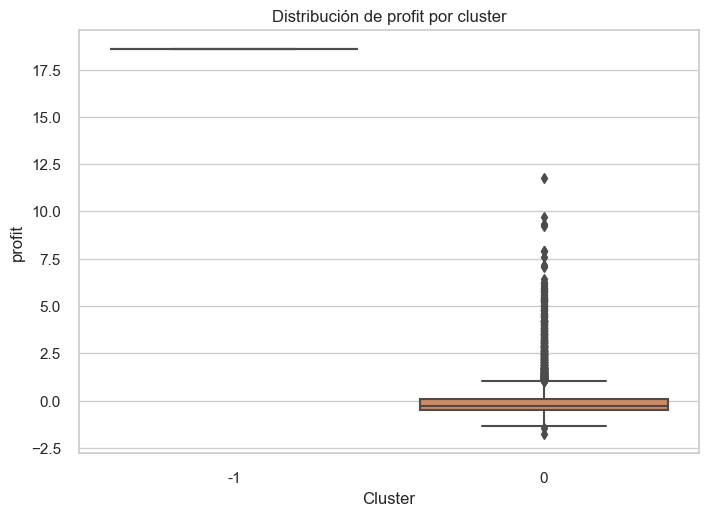

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



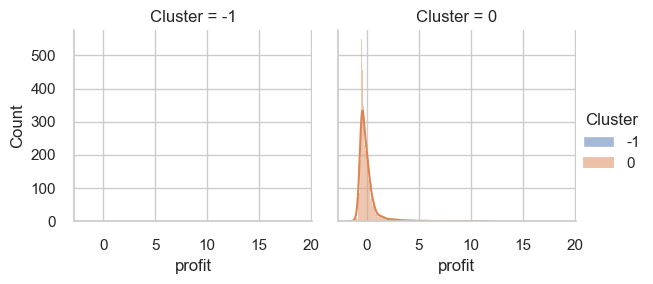

In [267]:
sns.boxplot(x='Cluster', y='profit', data=data)
plt.title('Distribución de profit por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "profit", kde=True).add_legend()
plt.show()

## DBSCAN con TSNE

In [268]:
TSNE_ds = pd.read_csv('data_reduccion_TSNE.csv',sep=',')
TSNE_ds.head()

col1       col2
0  77.851524   2.385391
1  76.315350  -1.828141
2  75.583790  -1.857253
3  76.508800   0.505781
4  58.744114 -17.393680

In [269]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

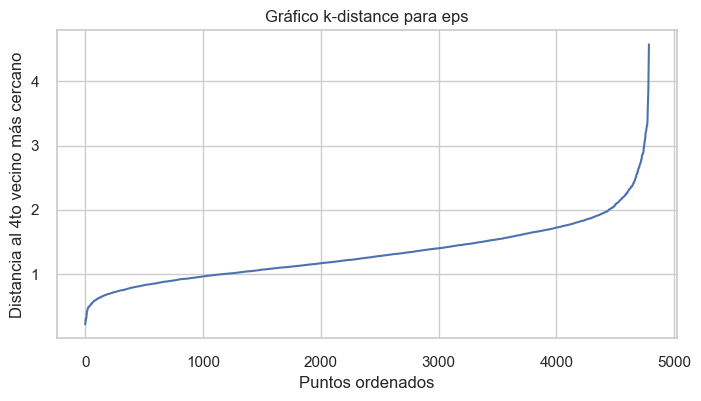

In [270]:
vecinos = NearestNeighbors(n_neighbors=5)
vecinos_ajuste = vecinos.fit(TSNE_ds)
distancias, _ = vecinos_ajuste.kneighbors(TSNE_ds)

distancias = np.sort(distancias[:, 4])  
plt.figure(figsize=(8, 4))
plt.plot(distancias)
plt.title("Gráfico k-distance para eps")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4to vecino más cercano")
plt.grid(True)
plt.show()

In [272]:
dbscan = DBSCAN(eps=4, min_samples=5)
etiquetas_db = dbscan.fit_predict(TSNE_ds)

mask = etiquetas_db != -1
labels_filtrados = etiquetas_db[mask]
if len(set(labels_filtrados)) > 1:
    score = silhouette_score(TSNE_ds[mask], labels_filtrados)
    print(f"Silhouette Score (sin outliers): {score:.2f}")
else:
    print("No hay suficientes clusters para calcular silhouette score.")
    
score = silhouette_score(TSNE_ds, etiquetas_db)
print(f"Silhouette Score DBSCAN: {score:.2f}")
dbi_dbscan = davies_bouldin_score(TSNE_ds, etiquetas_db)
print(f"Davies-Bouldin Index - DBSCAN: {dbi_dbscan}")
TSNE_ds['Cluster'] = etiquetas_db
data['Cluster'] = etiquetas_db

Silhouette Score (sin outliers): -0.46
Silhouette Score DBSCAN: -0.50
Davies-Bouldin Index - DBSCAN: 2.173267693095774


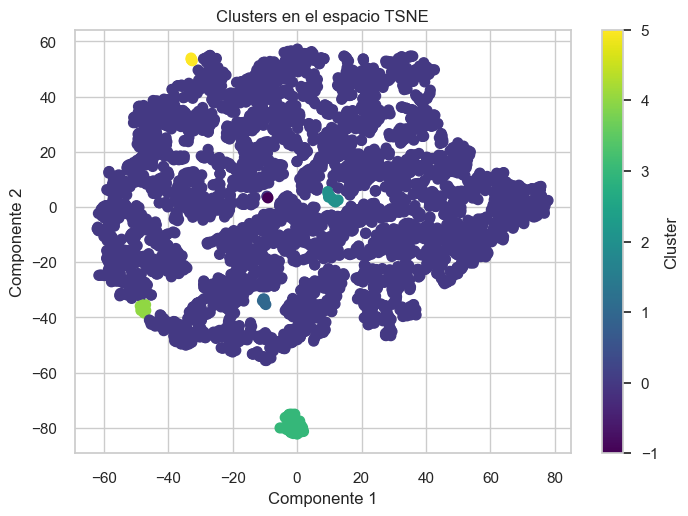

In [273]:
x = TSNE_ds.iloc[:, 0] 
y = TSNE_ds.iloc[:, 1]  

plt.scatter(x, y, c=dbscan.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio TSNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

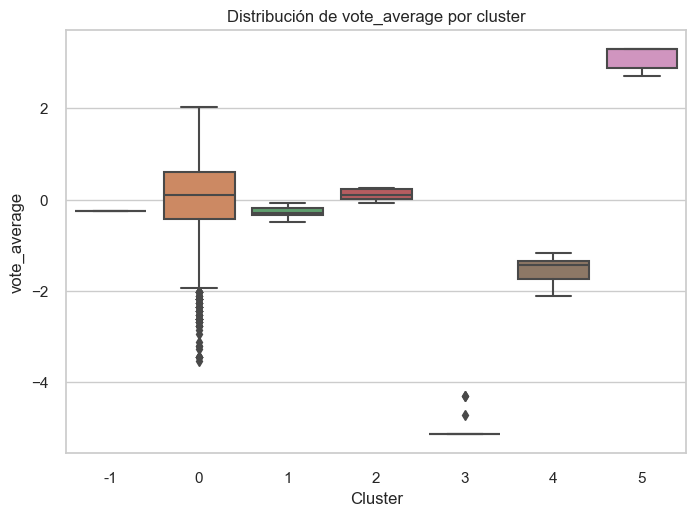

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

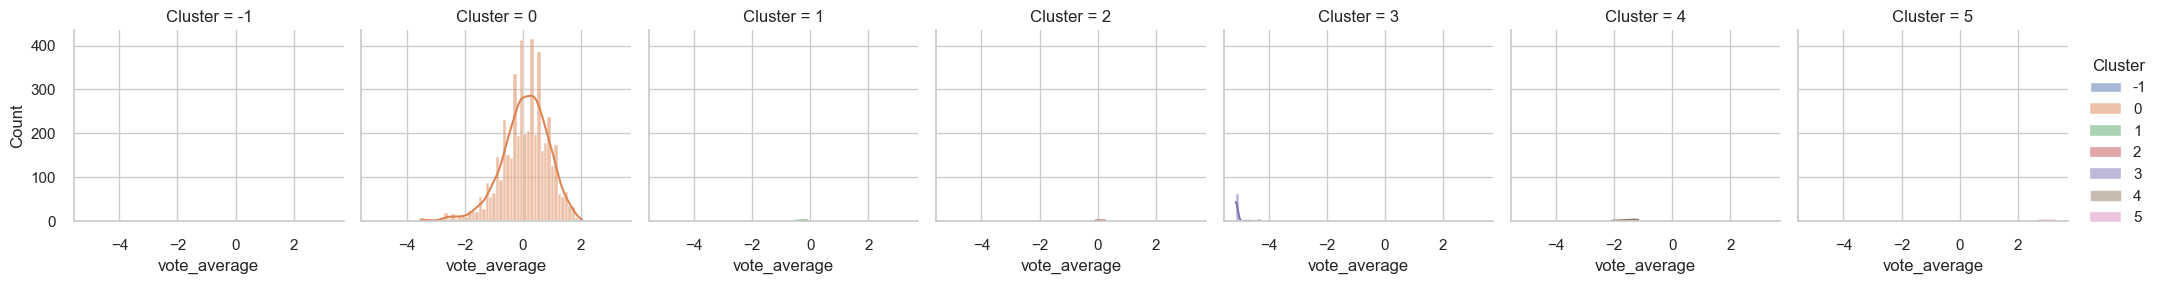

In [275]:
sns.boxplot(x='Cluster', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

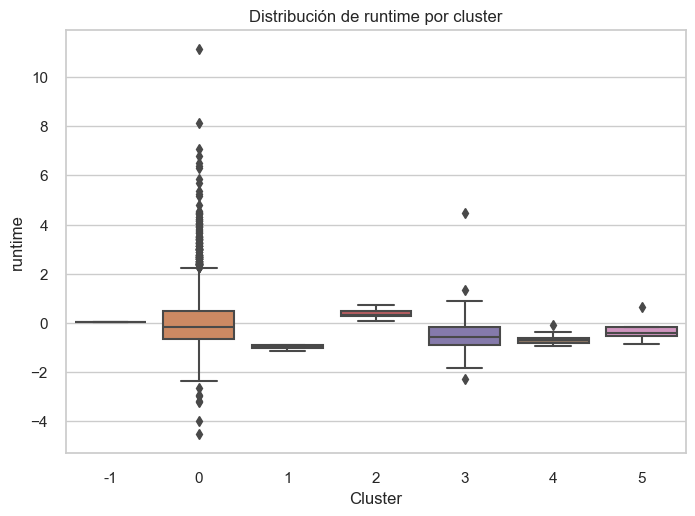

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

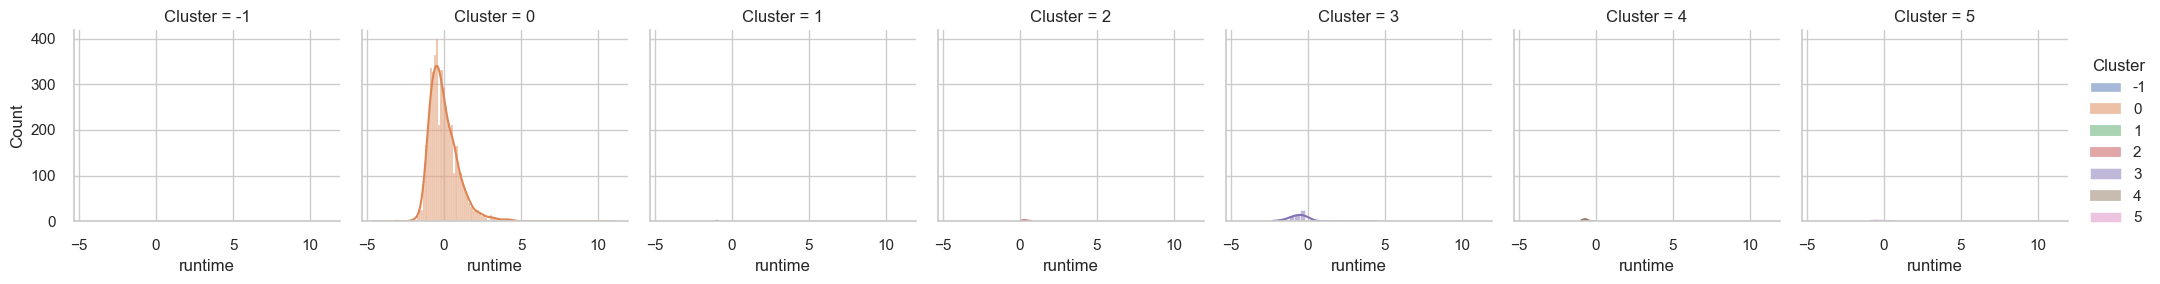

In [276]:
sns.boxplot(x='Cluster', y='runtime', data=data)
plt.title('Distribución de runtime por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "runtime", kde=True).add_legend()
plt.show()

## DBSCAN con UMAP

In [277]:
UMAP_ds = pd.read_csv('data_reduccion_UMAP.csv',sep=',')
UMAP_ds.head()

col1      col2
0  12.779681  2.420979
1  12.652773  2.401349
2  12.613903  2.412118
3  12.749394  2.439888
4  11.071385  4.302543

In [278]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

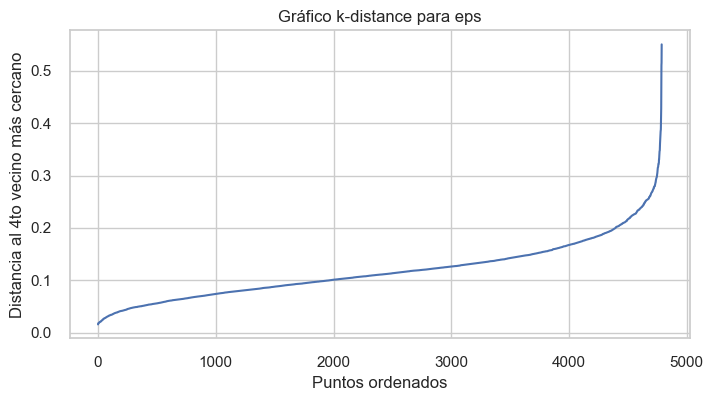

In [279]:
vecinos = NearestNeighbors(n_neighbors=5)
vecinos_ajuste = vecinos.fit(UMAP_ds)
distancias, _ = vecinos_ajuste.kneighbors(UMAP_ds)

distancias = np.sort(distancias[:, 4])  
plt.figure(figsize=(8, 4))
plt.plot(distancias)
plt.title("Gráfico k-distance para eps")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 4to vecino más cercano")
plt.grid(True)
plt.show()

In [283]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
etiquetas_db = dbscan.fit_predict(UMAP_ds)

mask = etiquetas_db != -1
labels_filtrados = etiquetas_db[mask]
if len(set(labels_filtrados)) > 1:
    score = silhouette_score(UMAP_ds[mask], labels_filtrados)
    print(f"Silhouette Score (sin outliers): {score:.2f}")
else:
    print("No hay suficientes clusters para calcular silhouette score.")
    
score = silhouette_score(UMAP_ds, etiquetas_db)
print(f"Silhouette Score DBSCAN: {score:.2f}")
dbi_dbscan = davies_bouldin_score(UMAP_ds, etiquetas_db)
print(f"Davies-Bouldin Index - DBSCAN: {dbi_dbscan}")
UMAP_ds['Cluster'] = etiquetas_db
data['Cluster'] = etiquetas_db

Silhouette Score (sin outliers): 0.68
Silhouette Score DBSCAN: -0.03
Davies-Bouldin Index - DBSCAN: 1.6972764106116165


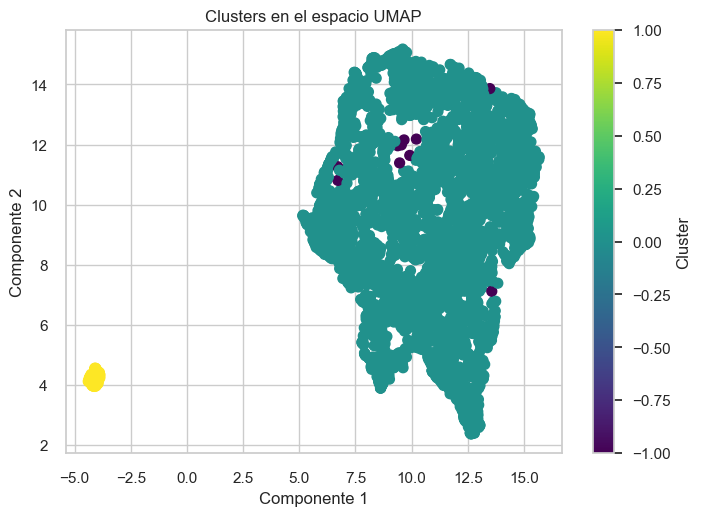

In [ ]:
x = UMAP_ds.iloc[:, 0] 
y = UMAP_ds.iloc[:, 1]  

plt.scatter(x, y, c=dbscan.labels_, cmap='viridis', s=50)
plt.title('Clusters en el espacio UMAP')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()

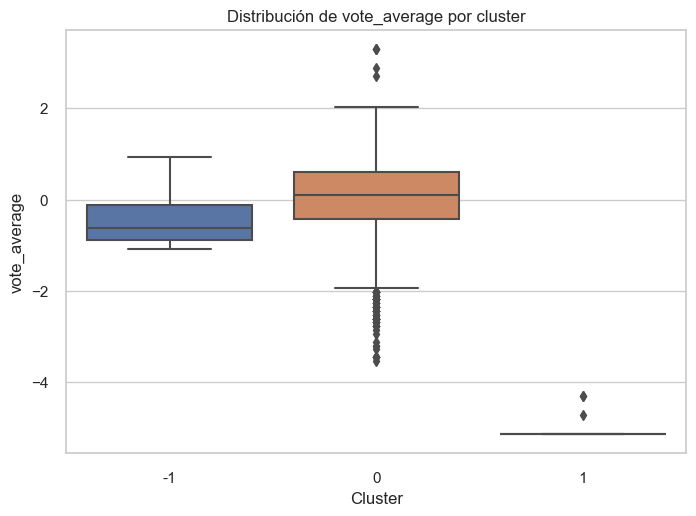

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



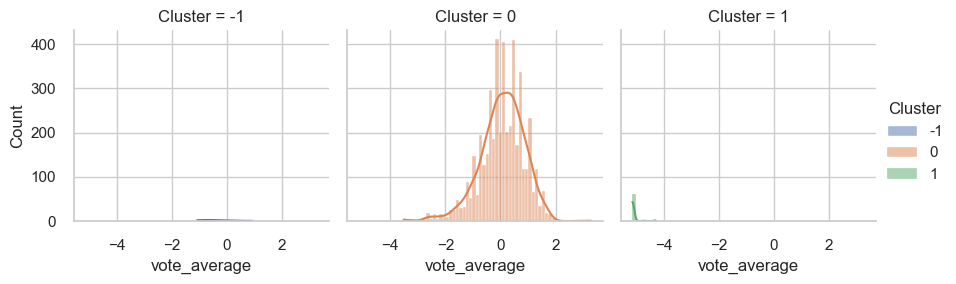

In [285]:
sns.boxplot(x='Cluster', y='vote_average', data=data)
plt.title('Distribución de vote_average por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "vote_average", kde=True).add_legend()
plt.show()

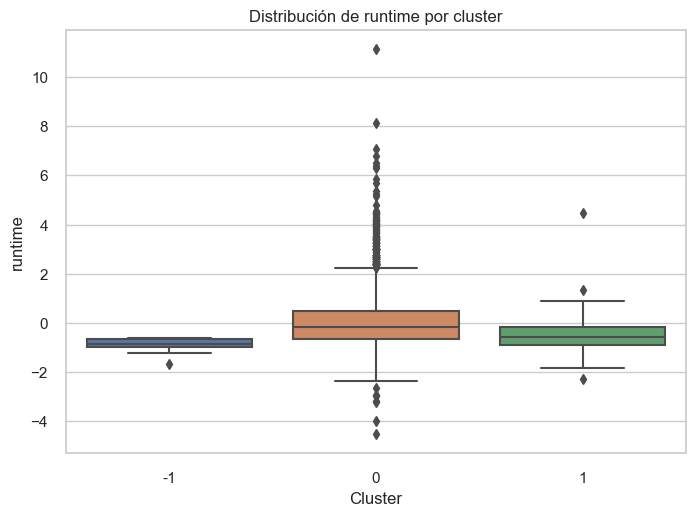

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



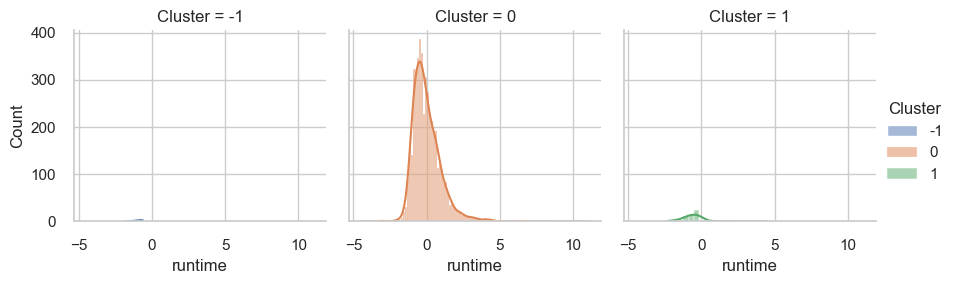

In [286]:
sns.boxplot(x='Cluster', y='runtime', data=data)
plt.title('Distribución de runtime por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "runtime", kde=True).add_legend()
plt.show()

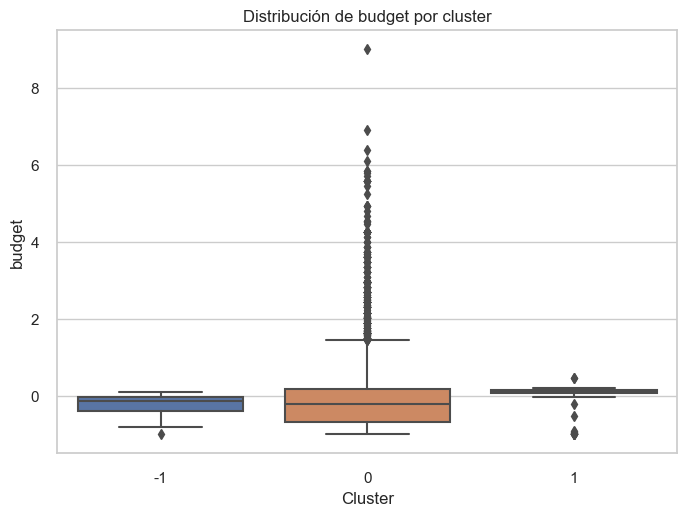

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\57311\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



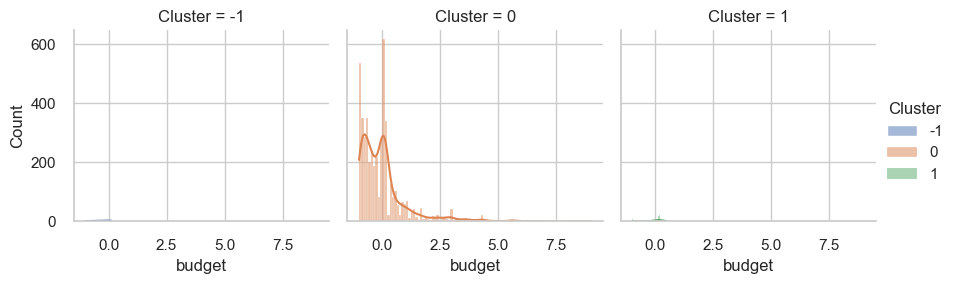

In [287]:
sns.boxplot(x='Cluster', y='budget', data=data)
plt.title('Distribución de budget por cluster')
plt.show()

g = sns.FacetGrid(data, col="Cluster", hue="Cluster", sharex=True, sharey=True)
g.map(sns.histplot, "budget", kde=True).add_legend()
plt.show()

## HDBSCAN con PCA

In [289]:
import pandas as pd
import numpy as np
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [290]:
PCA_ds = pd.read_csv('data_reduccion_PCA.csv',sep=',')
PCA_ds.head()

col1      col2
0  24.885150 -5.773971
1  10.685793 -1.138950
2   9.140041 -1.652615
3  12.603181 -0.774766
4   3.538913 -0.834590

In [291]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

In [292]:
min_cluster_sizes = [2,3,4,5, 10, 15, 20, 25]
min_samples_list = [None, 5, 10]

results = []

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_list:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(PCA_ds)
        
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        
        if n_clusters > 1:
            score = silhouette_score(PCA_ds[mask], labels[mask])
        else:
            score = -1
        
        results.append({
            "min_cluster_size": min_cluster_size,
            "min_samples": min_samples if min_samples is not None else "auto",
            "n_clusters": n_clusters,
            "silhouette_score": round(score, 2)
        })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="silhouette_score", ascending=False).head())

    min_cluster_size min_samples  n_clusters  silhouette_score
21                25        auto           2              0.61
18                20        auto           2              0.61
23                25          10           2              0.59
11                 5          10           3              0.58
20                20          10           3              0.58


Silhouette Score con HDBSCAN: 0.61


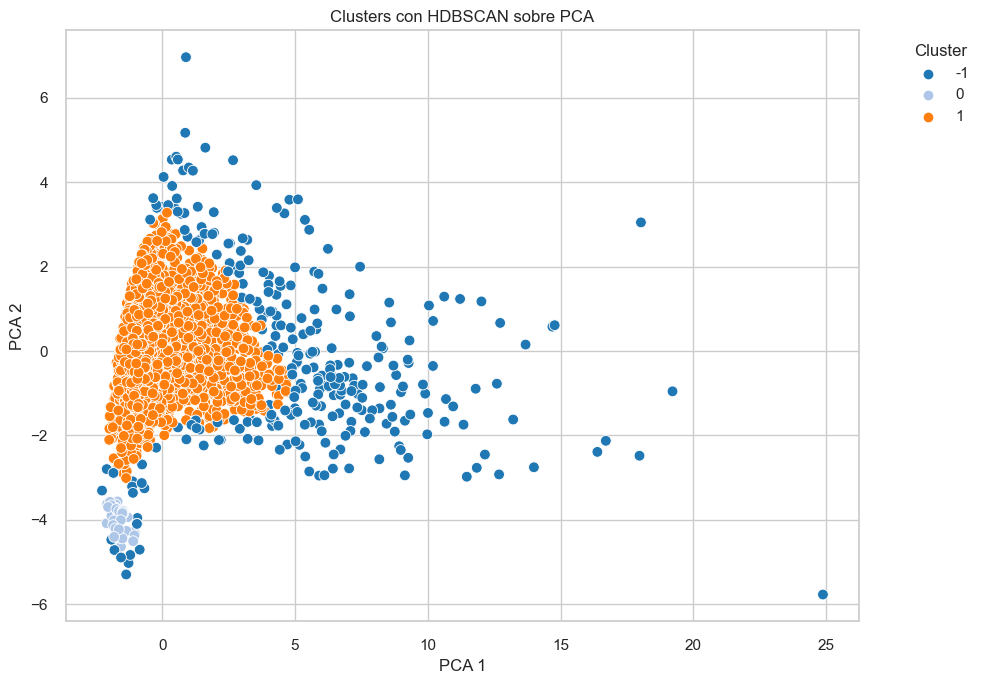

In [301]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=None)
labels_hdb = clusterer.fit_predict(PCA_ds)

mask = labels_hdb != -1
if len(set(labels_hdb[mask])) > 1:
    score = silhouette_score(PCA_ds[mask], labels_hdb[mask])
    print(f"Silhouette Score con HDBSCAN: {score:.2f}")
else:
    print("No hay suficientes clusters para calcular Silhouette Score.")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=PCA_ds['col1'], y=PCA_ds['col2'], hue=labels_hdb, palette="tab20", s=60)
plt.title("Clusters con HDBSCAN sobre PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

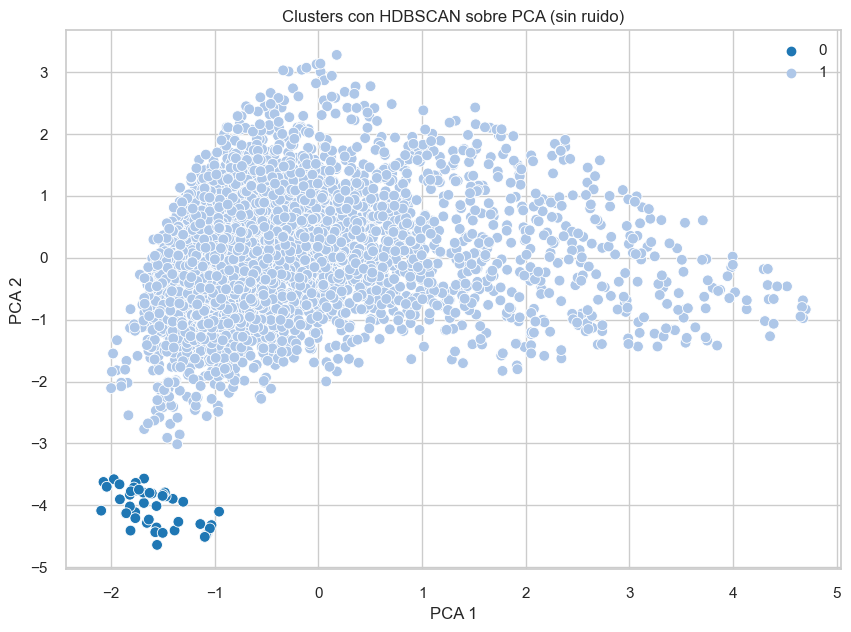

In [302]:
filtered_data = PCA_ds[labels_hdb != -1]
filtered_labels = labels_hdb[labels_hdb != -1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=filtered_data['col1'], 
    y=filtered_data['col2'], 
    hue=filtered_labels,        
    palette="tab20",            
    s=60                        
)
plt.title("Clusters con HDBSCAN sobre PCA (sin ruido)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## HDBSCAN TSNE

In [303]:
TSNE_ds = pd.read_csv('data_reduccion_TSNE.csv',sep=',')
TSNE_ds.head()

col1       col2
0  77.851524   2.385391
1  76.315350  -1.828141
2  75.583790  -1.857253
3  76.508800   0.505781
4  58.744114 -17.393680

In [304]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

In [305]:
min_cluster_sizes = [2,3,4,5, 10, 15, 20, 25]
min_samples_list = [None, 5, 10]

results = []

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_list:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(TSNE_ds)
        
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        
        if n_clusters > 1:
            score = silhouette_score(TSNE_ds[mask], labels[mask])
        else:
            score = -1
        
        results.append({
            "min_cluster_size": min_cluster_size,
            "min_samples": min_samples if min_samples is not None else "auto",
            "n_clusters": n_clusters,
            "silhouette_score": round(score, 2)
        })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="silhouette_score", ascending=False).head())

    min_cluster_size min_samples  n_clusters  silhouette_score
0                  2        auto         751              0.52
3                  3        auto         424              0.47
13                10           5           2              0.31
22                25           5           2              0.31
21                25        auto           2              0.31


Silhouette Score con HDBSCAN: 0.31


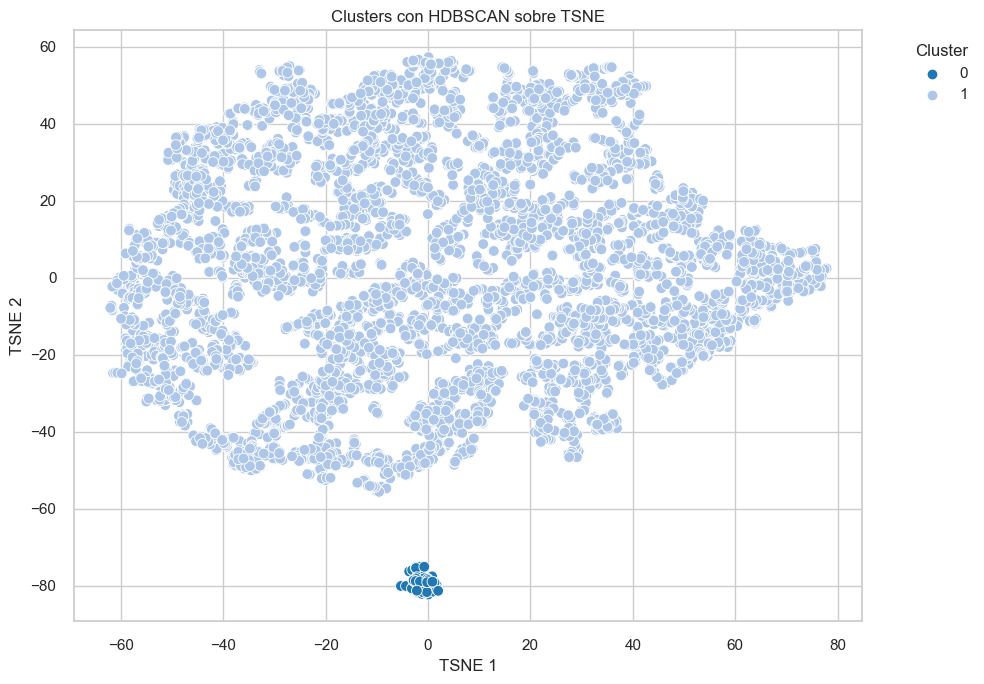

In [308]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=None)
labels_hdb = clusterer.fit_predict(TSNE_ds)

mask = labels_hdb != -1
if len(set(labels_hdb[mask])) > 1:
    score = silhouette_score(TSNE_ds[mask], labels_hdb[mask])
    print(f"Silhouette Score con HDBSCAN: {score:.2f}")
else:
    print("No hay suficientes clusters para calcular Silhouette Score.")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=TSNE_ds['col1'], y=TSNE_ds['col2'], hue=labels_hdb, palette="tab20", s=60)
plt.title("Clusters con HDBSCAN sobre TSNE")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

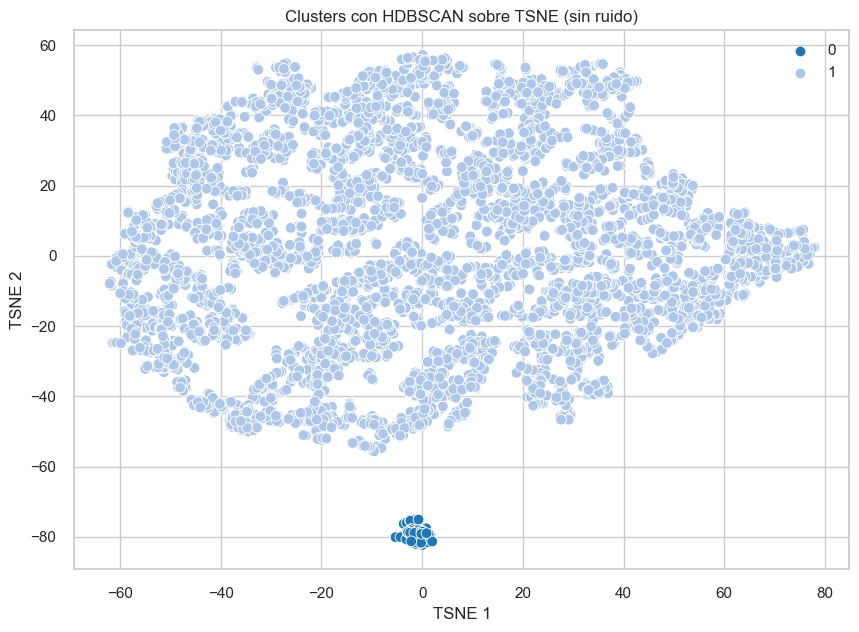

In [313]:
filtered_data = TSNE_ds[labels_hdb != -1]
filtered_labels = labels_hdb[labels_hdb != -1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=filtered_data['col1'], 
    y=filtered_data['col2'], 
    hue=filtered_labels,        
    palette="tab20",            
    s=60                        
)
plt.title("Clusters con HDBSCAN sobre TSNE (sin ruido)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

## HDBSCAN UMAP

In [314]:
UMAP_ds = pd.read_csv('data_reduccion_UMAP.csv',sep=',')
UMAP_ds.head()

col1      col2
0  12.779681  2.420979
1  12.652773  2.401349
2  12.613903  2.412118
3  12.749394  2.439888
4  11.071385  4.302543

In [315]:
data = pd.read_csv('Dataset_Peliculas_Estandarizado.csv',sep=',')
data.head()

budget    revenue   runtime  vote_average  vote_count  popularity  \
0  5.249417  17.154577  2.627291      0.933078    8.988141    4.047427   
1  6.906576   5.458504  2.965676      0.680253    3.081107    3.690836   
2  5.459850   4.944267  1.950520      0.174604    3.053595    2.695145   
3  5.591371   6.251951  2.772313      1.270177    6.808203    2.850161   
4  5.854412   1.125298  1.177069      0.006055    1.158489    0.702566   

      profit  
0  18.579924  
1   4.420685  
2   4.230952  
3   5.723801  
4  -0.350550

In [316]:
min_cluster_sizes = [2,3,4,5, 10, 15, 20, 25]
min_samples_list = [None, 5, 10]

results = []

for min_cluster_size in min_cluster_sizes:
    for min_samples in min_samples_list:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(UMAP_ds)
        
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        
        if n_clusters > 1:
            score = silhouette_score(UMAP_ds[mask], labels[mask])
        else:
            score = -1
        
        results.append({
            "min_cluster_size": min_cluster_size,
            "min_samples": min_samples if min_samples is not None else "auto",
            "n_clusters": n_clusters,
            "silhouette_score": round(score, 2)
        })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="silhouette_score", ascending=False).head())

    min_cluster_size min_samples  n_clusters  silhouette_score
12                10        auto           2              0.68
11                 5          10           2              0.68
22                25           5           2              0.68
21                25        auto           2              0.68
20                20          10           2              0.68


Silhouette Score con HDBSCAN: 0.68


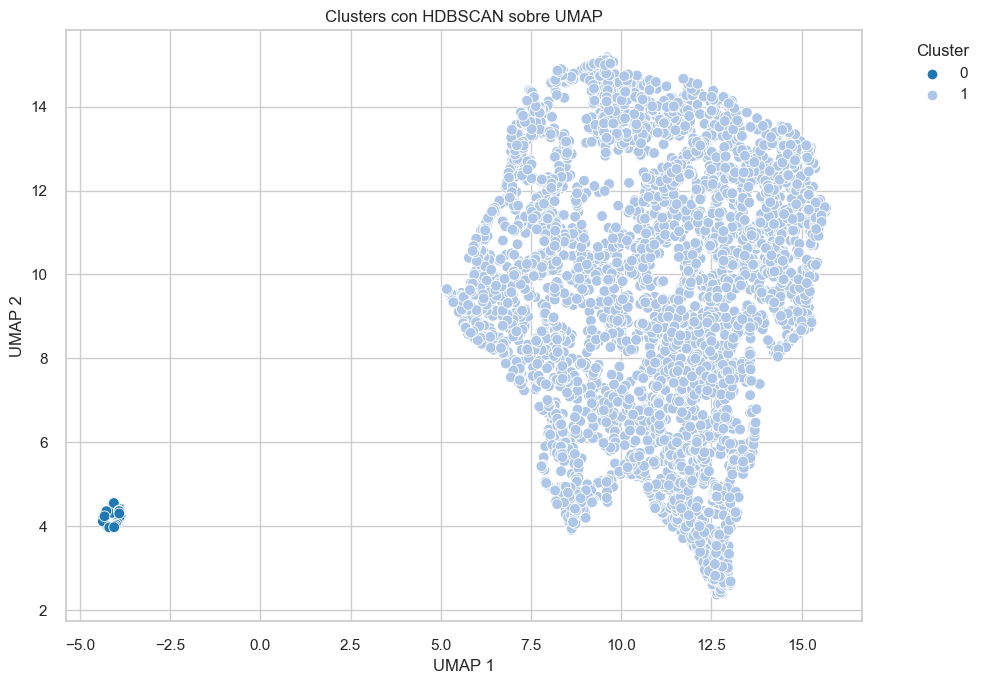

In [320]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=None)
labels_hdb = clusterer.fit_predict(UMAP_ds)

mask = labels_hdb != -1
if len(set(labels_hdb[mask])) > 1:
    score = silhouette_score(UMAP_ds[mask], labels_hdb[mask])
    print(f"Silhouette Score con HDBSCAN: {score:.2f}")
else:
    print("No hay suficientes clusters para calcular Silhouette Score.")

plt.figure(figsize=(10, 7))
sns.scatterplot(x=UMAP_ds['col1'], y=UMAP_ds['col2'], hue=labels_hdb, palette="tab20", s=60)
plt.title("Clusters con HDBSCAN sobre UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

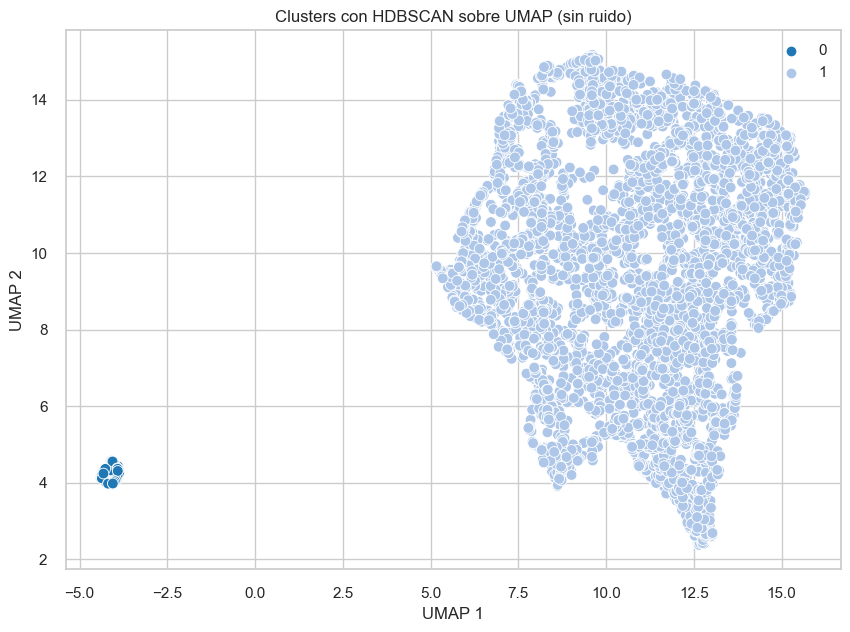

In [318]:
filtered_data = UMAP_ds[labels_hdb != -1]
filtered_labels = labels_hdb[labels_hdb != -1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=filtered_data['col1'], 
    y=filtered_data['col2'], 
    hue=filtered_labels,        
    palette="tab20",            
    s=60                        
)
plt.title("Clusters con HDBSCAN sobre UMAP (sin ruido)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()